# Data Exploration Starter
## Zillow’s Home Value Prediction

In [10]:
### Necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
### Seaborn style
sns.set_style("whitegrid")

In [11]:
## Dictionary of feature dtypes
ints = ['parcelid']

floats = ['basementsqft', 'bathroomcnt', 'bedroomcnt', 'calculatedbathnbr', 'finishedfloor1squarefeet', 
          'calculatedfinishedsquarefeet', 'finishedsquarefeet12', 'finishedsquarefeet13',
          'finishedsquarefeet15', 'finishedsquarefeet50', 'finishedsquarefeet6', 'fireplacecnt',
          'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'latitude', 'longitude',
          'lotsizesquarefeet', 'poolcnt', 'poolsizesum', 'roomcnt', 'threequarterbathnbr', 'unitcnt',
          'yardbuildingsqft17', 'yardbuildingsqft26', 'yearbuilt', 'numberofstories',
          'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'assessmentyear',
          'landtaxvaluedollarcnt', 'taxamount', 'taxdelinquencyyear']

objects = ['airconditioningtypeid', 'architecturalstyletypeid', 'buildingclasstypeid',
           'buildingqualitytypeid', 'decktypeid', 'fips', 'hashottuborspa', 'heatingorsystemtypeid',
           'pooltypeid10', 'pooltypeid2', 'pooltypeid7', 'propertycountylandusecode',
           'propertylandusetypeid', 'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
           'regionidcounty', 'regionidneighborhood', 'regionidzip', 'storytypeid',
           'typeconstructiontypeid', 'fireplaceflag', 'taxdelinquencyflag', 'censustractandblock']

feature_dtypes = {col: col_type for type_list, col_type in zip([ints, floats, objects],
                                                               ['int64', 'float64', 'object']) 
                                  for col in type_list}

# Download Files
Read files from google drive. properties_2016.csv (~200MB) and train_2016_v2.csv (~25KB)
PLEASE NOTE THAT THIS STEP WILL TAKE atleast 10-15 minutes depending on your internet connection speed. 
Download raw data files from following location on Google Drive and Put in home directory.

train_2016_v3.csv 
https://drive.google.com/file/d/1cegcD7DnMQuZyV-0iVu5aoNHvyHtQZgD/view?usp=sharing
properties_2016.csv.zip 
https://drive.google.com/file/d/1hpvIB3Zszhlfn9-4Z_JpOqBoqajL05_-/view?usp=sharing
Unzip properties_2016.csv.zip 



In [12]:
### Let's import our data
data = pd.read_csv('properties_2016.csv' , dtype = feature_dtypes)
### and test if everything OK
data.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3,7,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [13]:
### ... check for NaNs
nan = data.isnull().sum()
nan

parcelid                              0
airconditioningtypeid           2173698
architecturalstyletypeid        2979156
basementsqft                    2983589
bathroomcnt                       11462
bedroomcnt                        11450
buildingclasstypeid             2972588
buildingqualitytypeid           1046729
calculatedbathnbr                128912
decktypeid                      2968121
finishedfloor1squarefeet        2782500
calculatedfinishedsquarefeet      55565
finishedsquarefeet12             276033
finishedsquarefeet13            2977545
finishedsquarefeet15            2794419
finishedsquarefeet50            2782500
finishedsquarefeet6             2963216
fips                              11437
fireplacecnt                    2672580
fullbathcnt                      128912
garagecarcnt                    2101950
garagetotalsqft                 2101950
hashottuborspa                  2916203
heatingorsystemtypeid           1178816
latitude                          11437


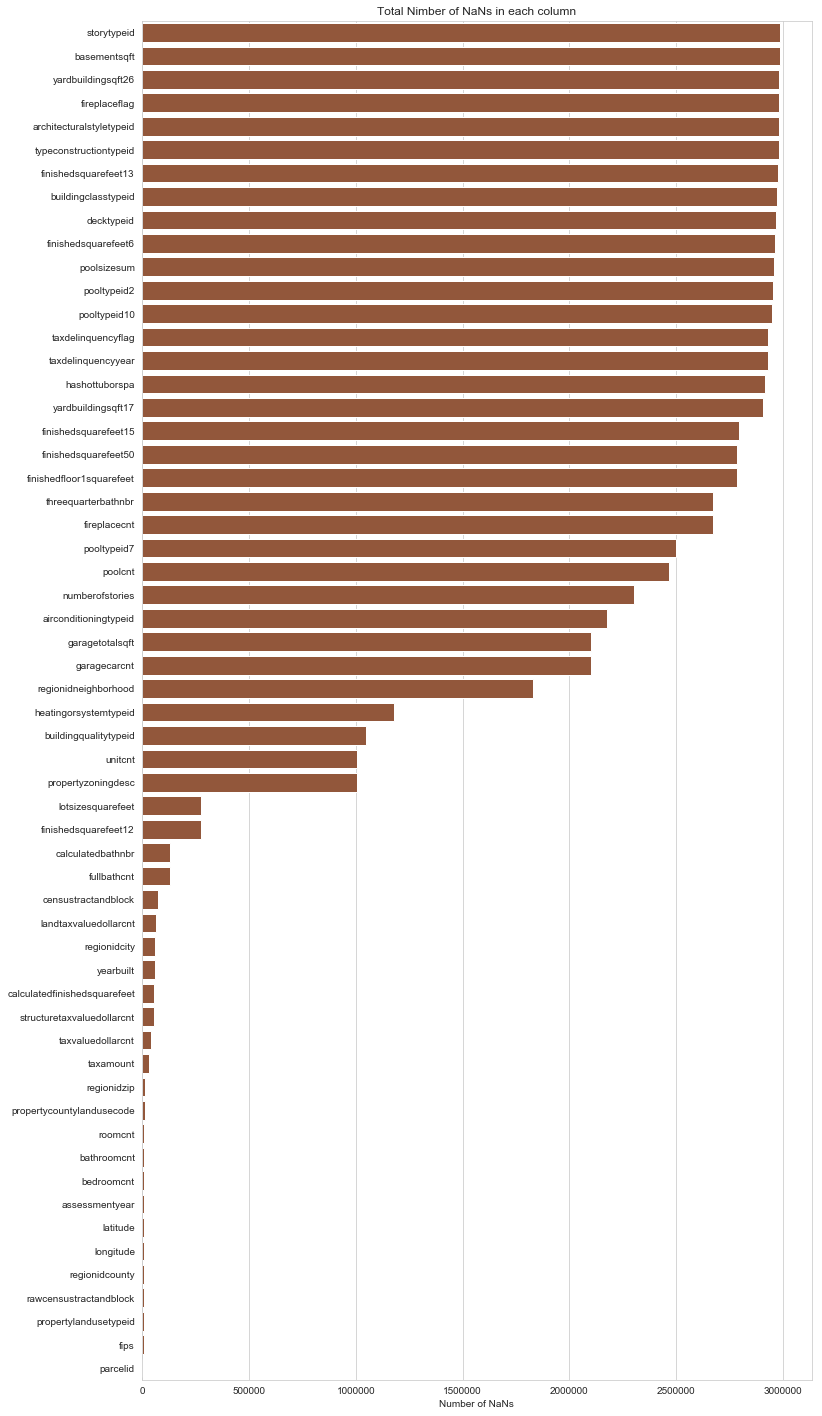

In [14]:
### Plotting NaN counts
nan_sorted = nan.sort_values(ascending=False).to_frame().reset_index()
nan_sorted.columns = ['Column', 'Number of NaNs']

fig, ax = plt.subplots(figsize=(12, 25))
sns.barplot(x="Number of NaNs", y="Column", data=nan_sorted, color='Sienna', ax=ax);
ax.set(xlabel="Number of NaNs", ylabel="", title="Total Nimber of NaNs in each column");

In [15]:
data.dtypes

parcelid                          int64
airconditioningtypeid            object
architecturalstyletypeid         object
basementsqft                    float64
bathroomcnt                     float64
bedroomcnt                      float64
buildingclasstypeid              object
buildingqualitytypeid            object
calculatedbathnbr               float64
decktypeid                       object
finishedfloor1squarefeet        float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
finishedsquarefeet13            float64
finishedsquarefeet15            float64
finishedsquarefeet50            float64
finishedsquarefeet6             float64
fips                             object
fireplacecnt                    float64
fullbathcnt                     float64
garagecarcnt                    float64
garagetotalsqft                 float64
hashottuborspa                   object
heatingorsystemtypeid            object
latitude                        float64


### Univariate Analysis

In [16]:
continuous = ['basementsqft', 'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet', 
              'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
              'finishedsquarefeet50', 'finishedsquarefeet6', 'garagetotalsqft', 'latitude',
              'longitude', 'lotsizesquarefeet', 'poolsizesum',  'yardbuildingsqft17',
              'yardbuildingsqft26', 'yearbuilt', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt',
              'landtaxvaluedollarcnt', 'taxamount']

discrete = ['bathroomcnt', 'bedroomcnt', 'calculatedbathnbr', 'fireplacecnt', 'fullbathcnt',
            'garagecarcnt', 'poolcnt', 'roomcnt', 'threequarterbathnbr', 'unitcnt',
            'numberofstories', 'assessmentyear', 'taxdelinquencyyear']

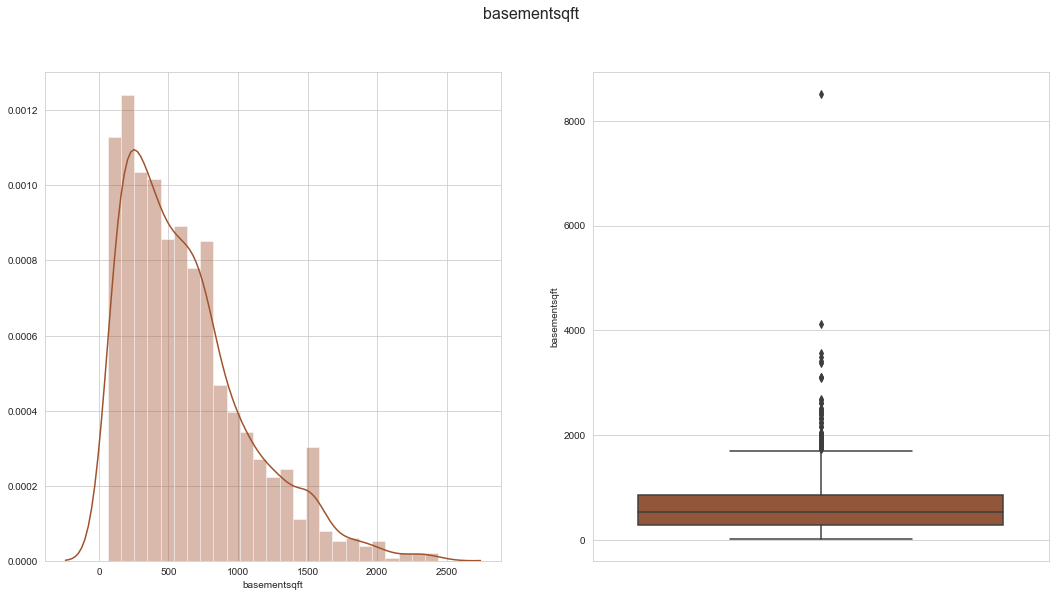

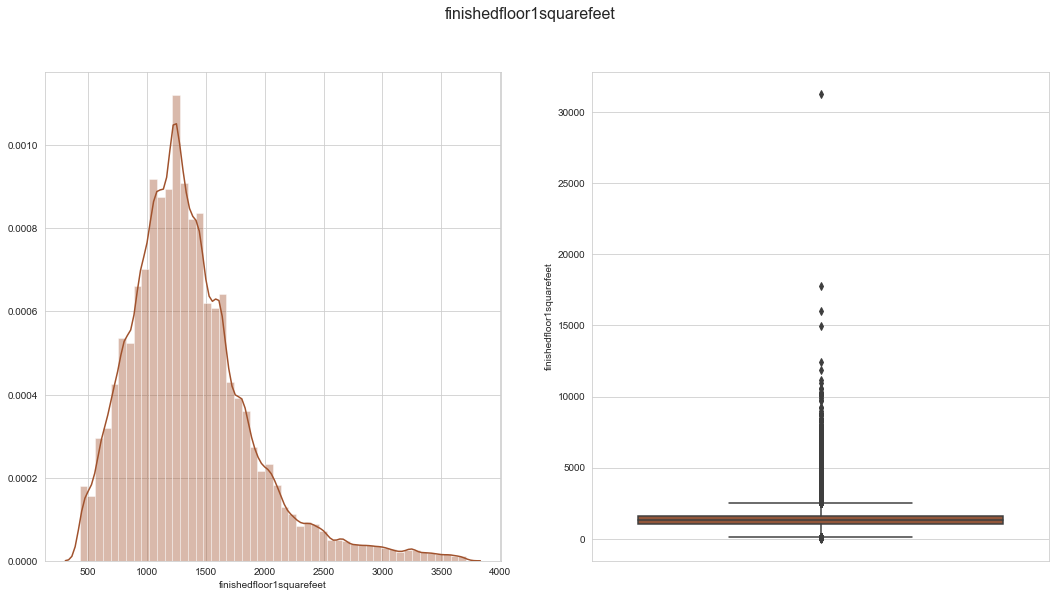

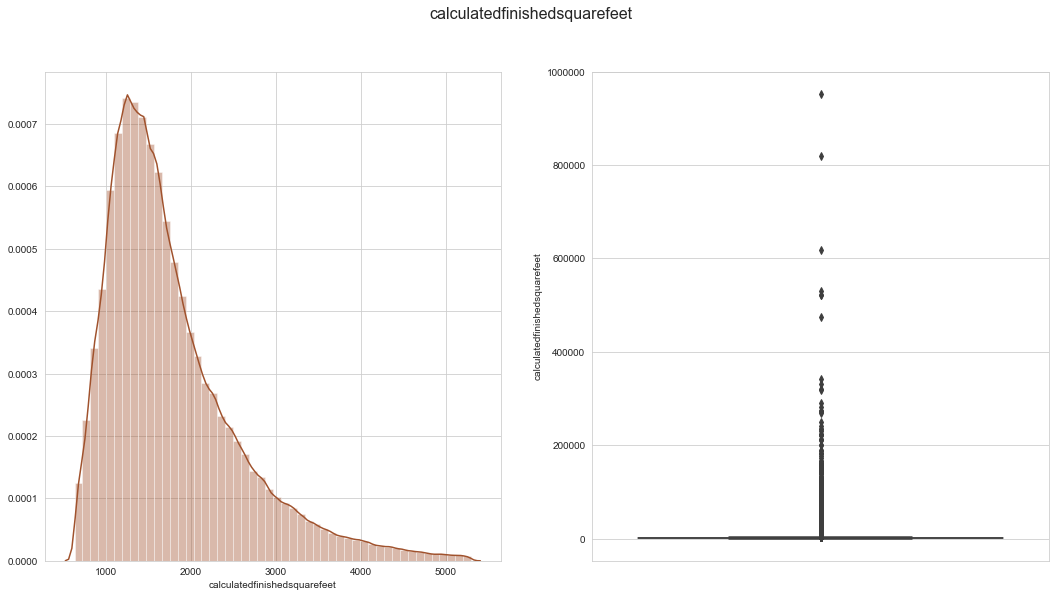

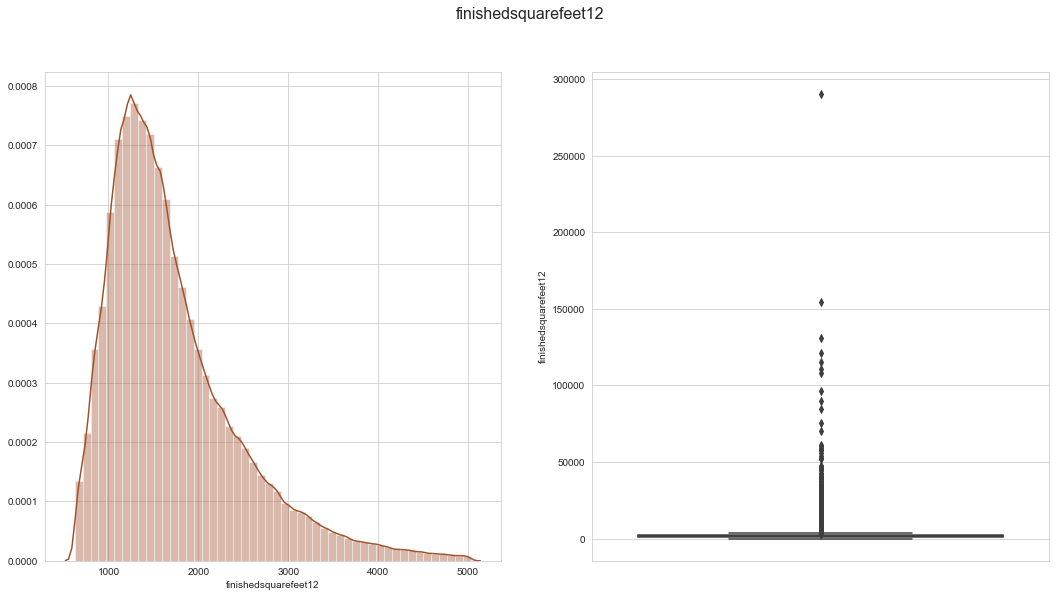

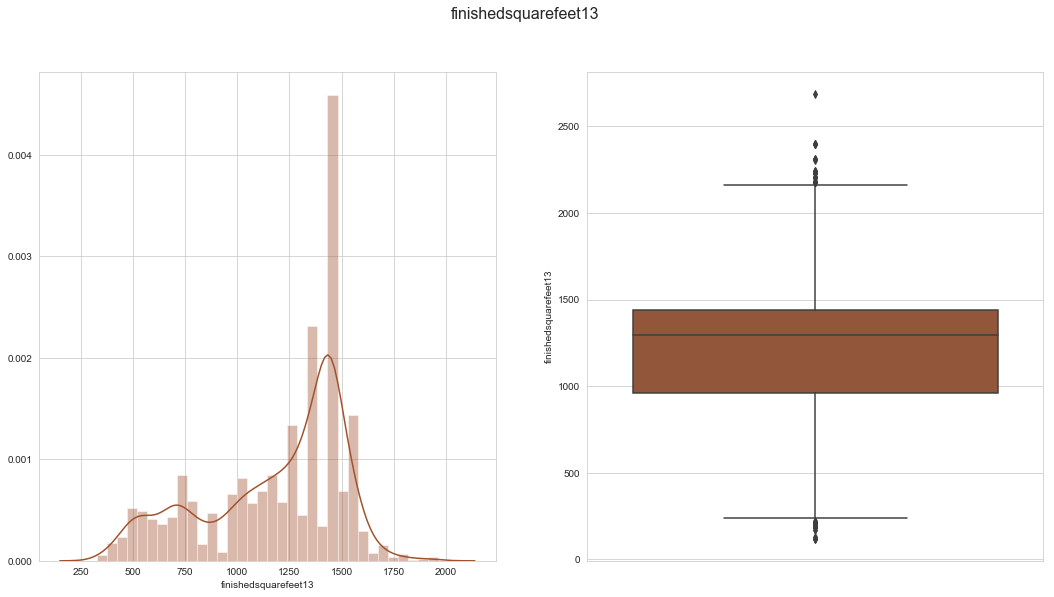

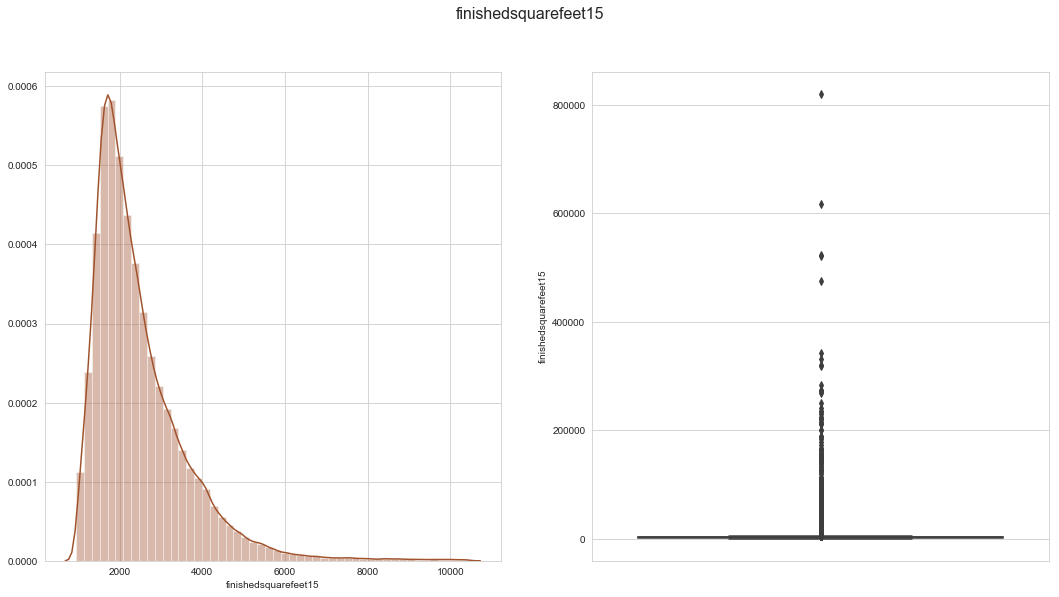

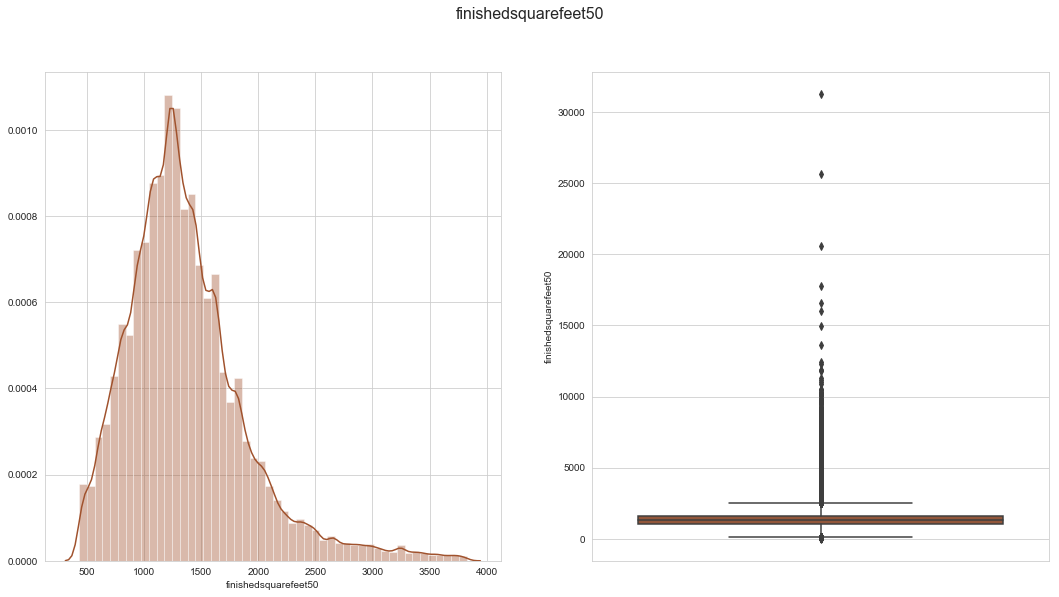

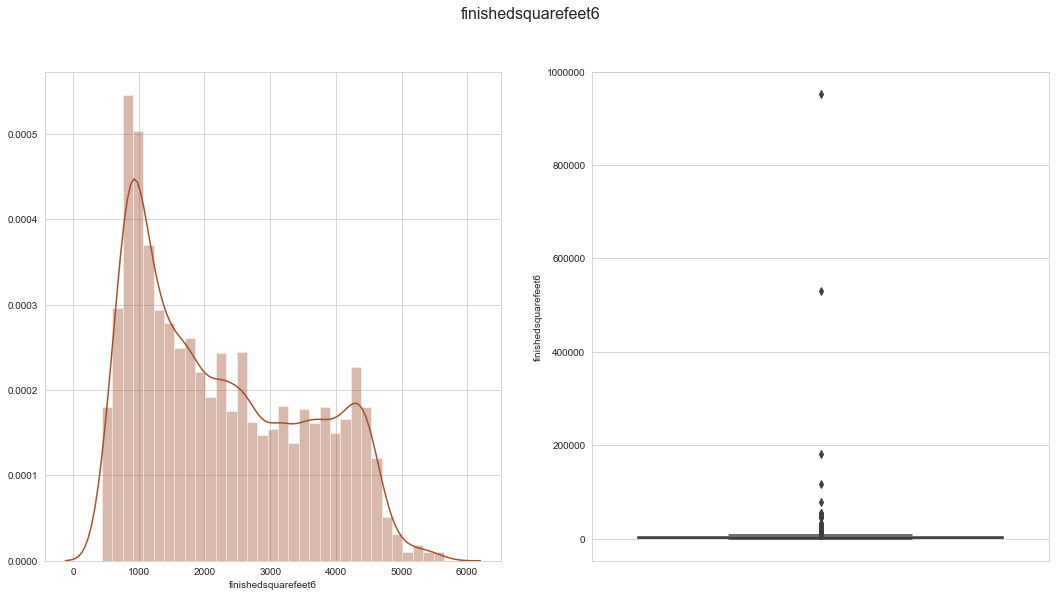

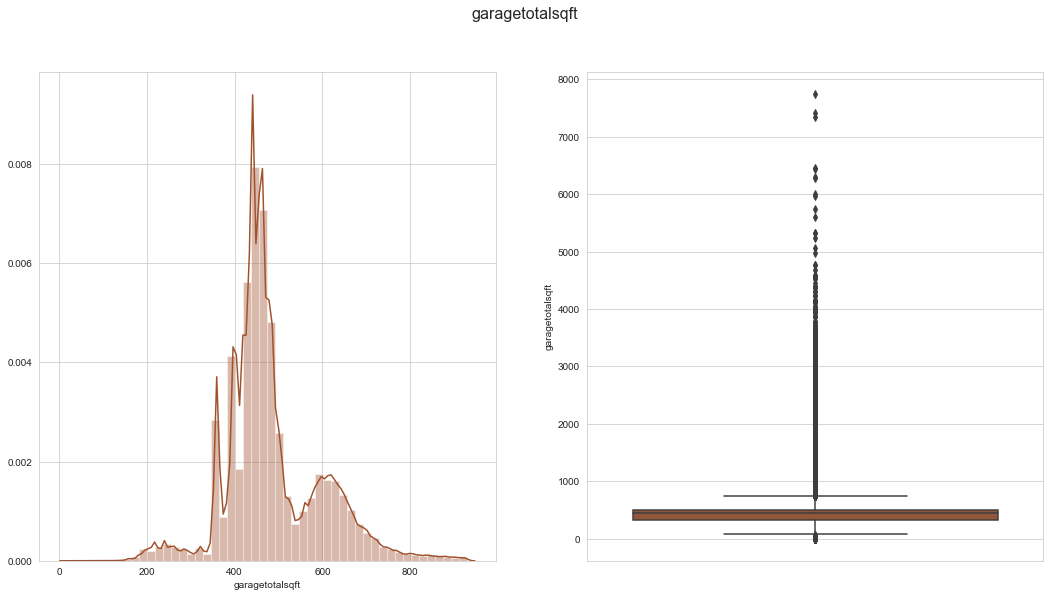

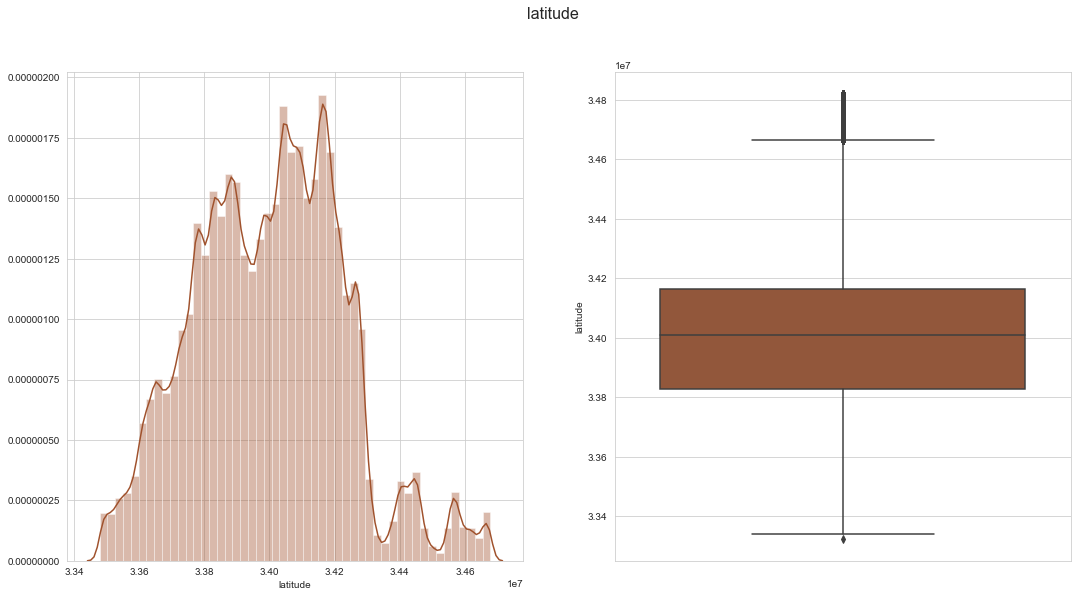

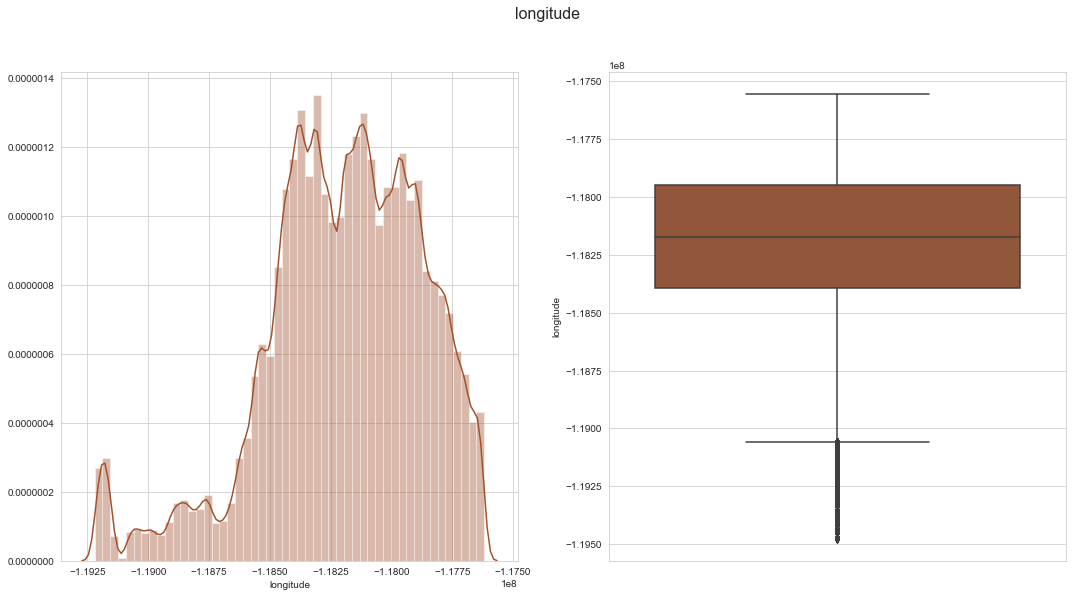

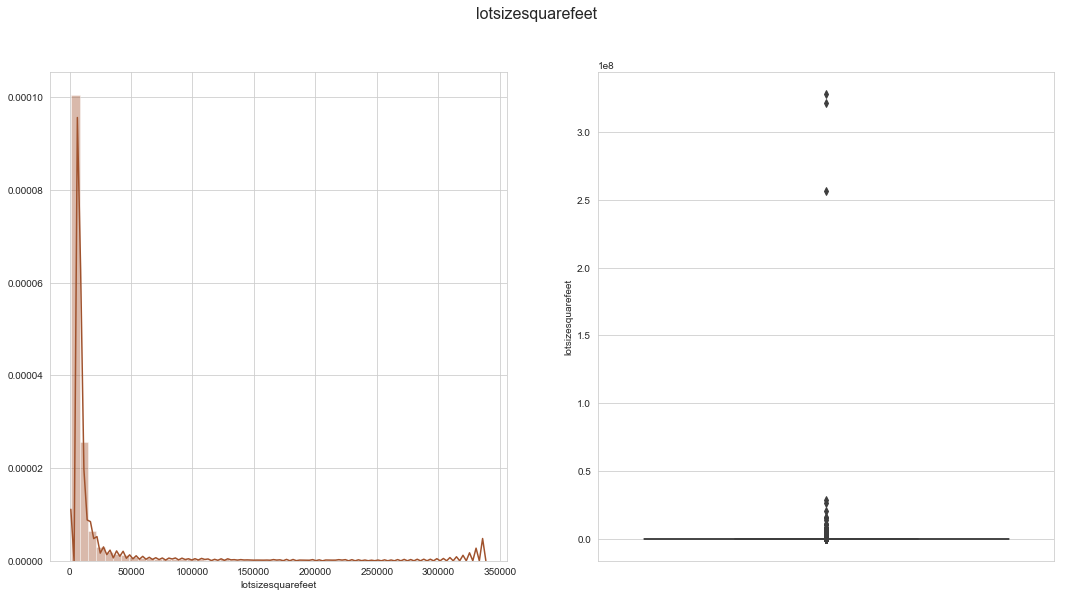

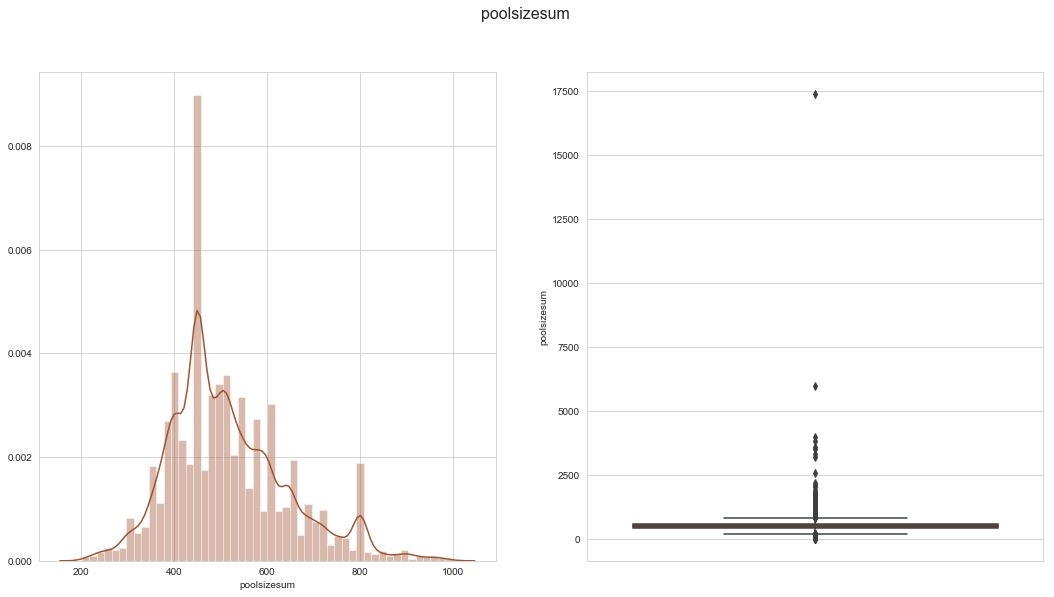

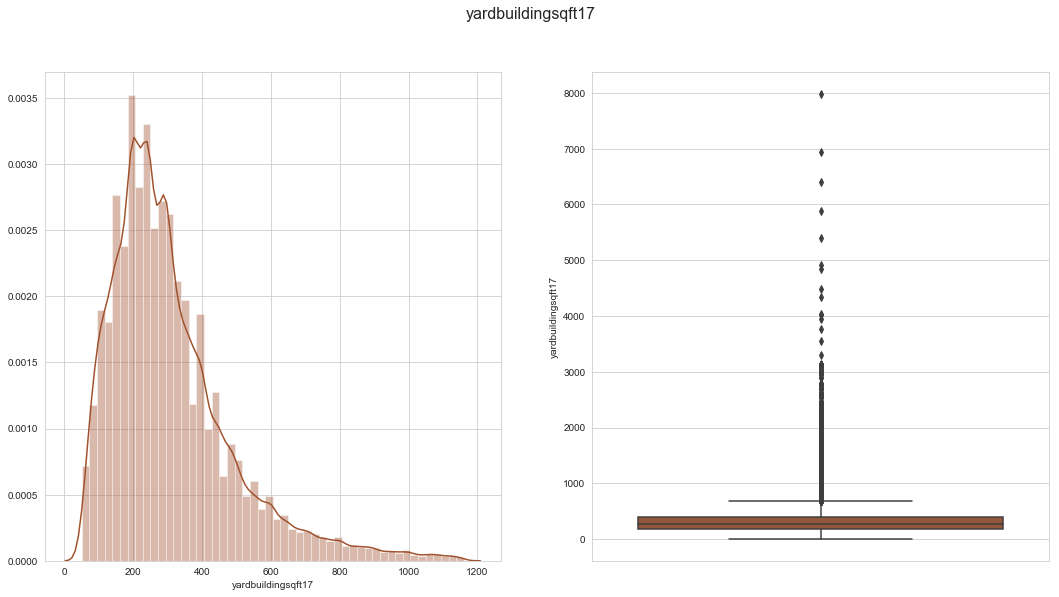

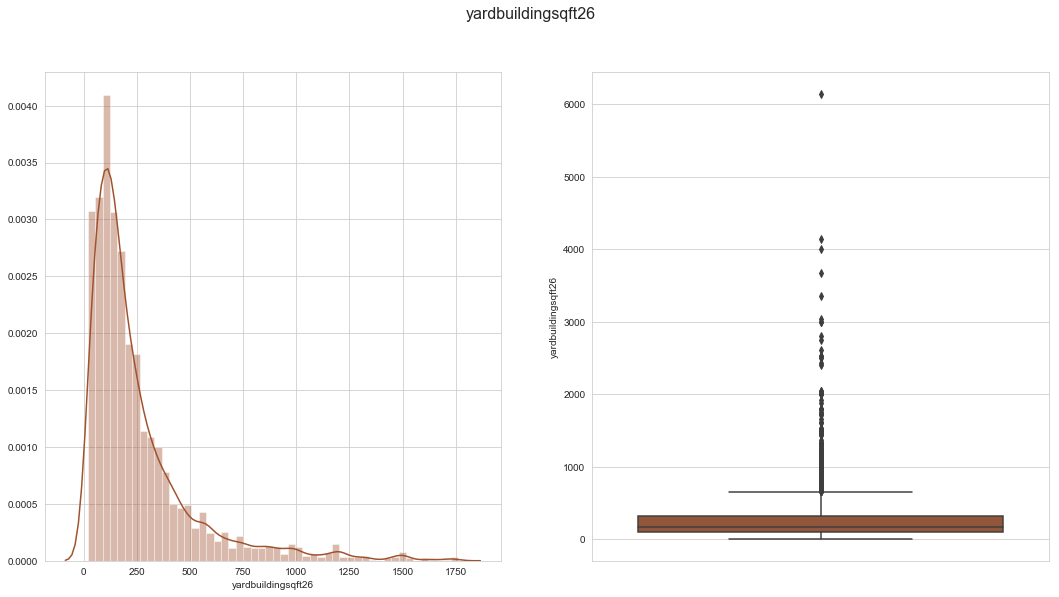

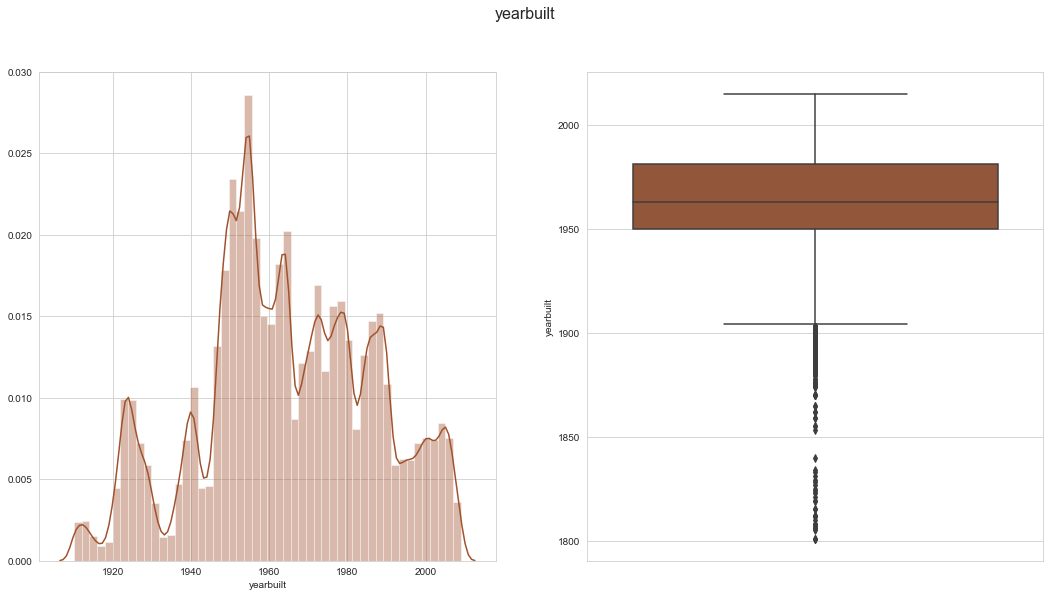

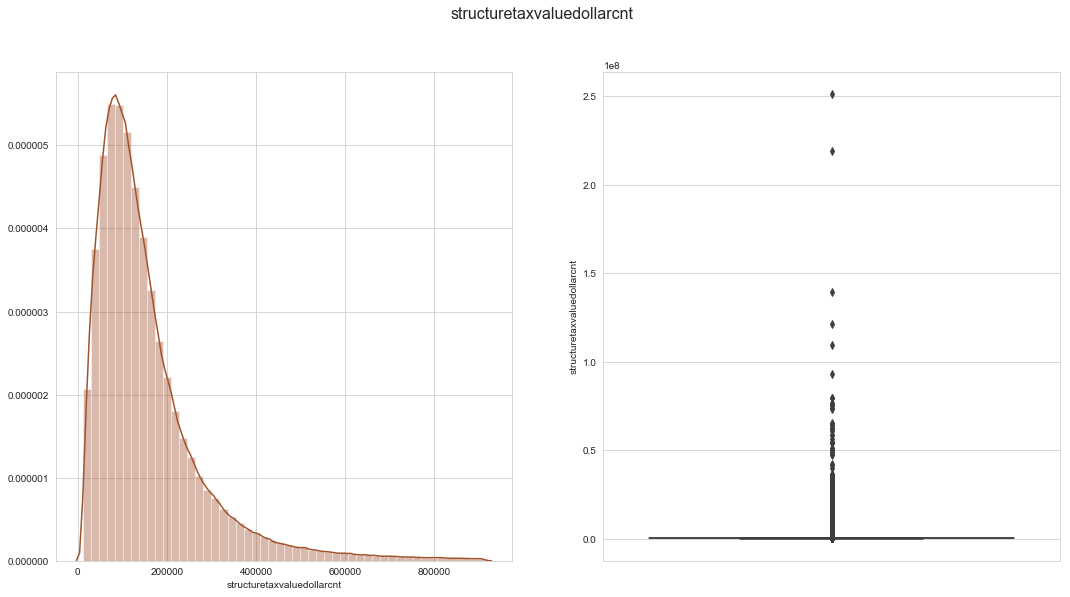

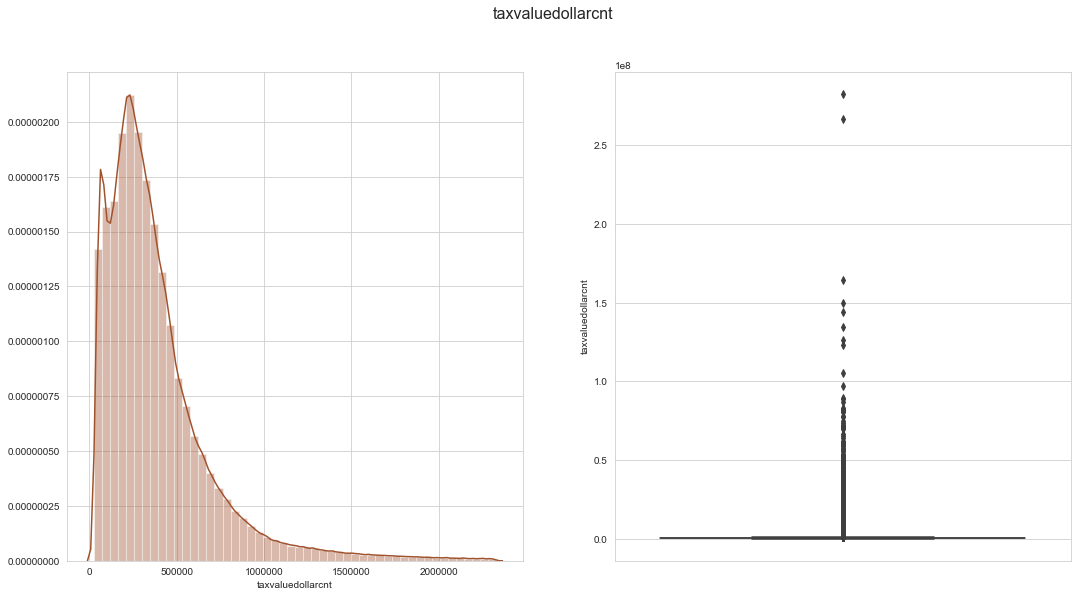

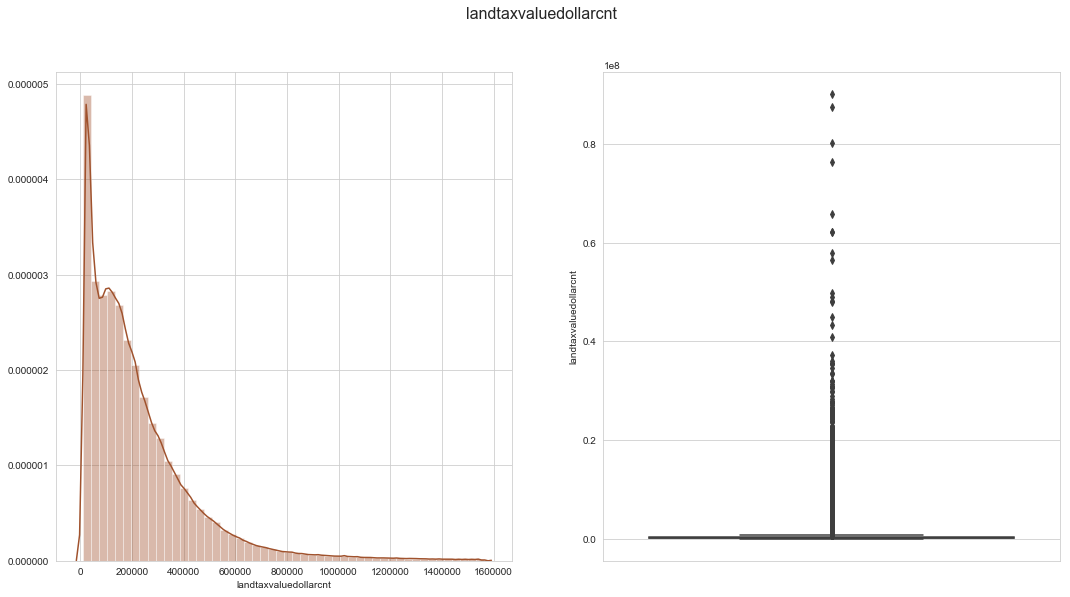

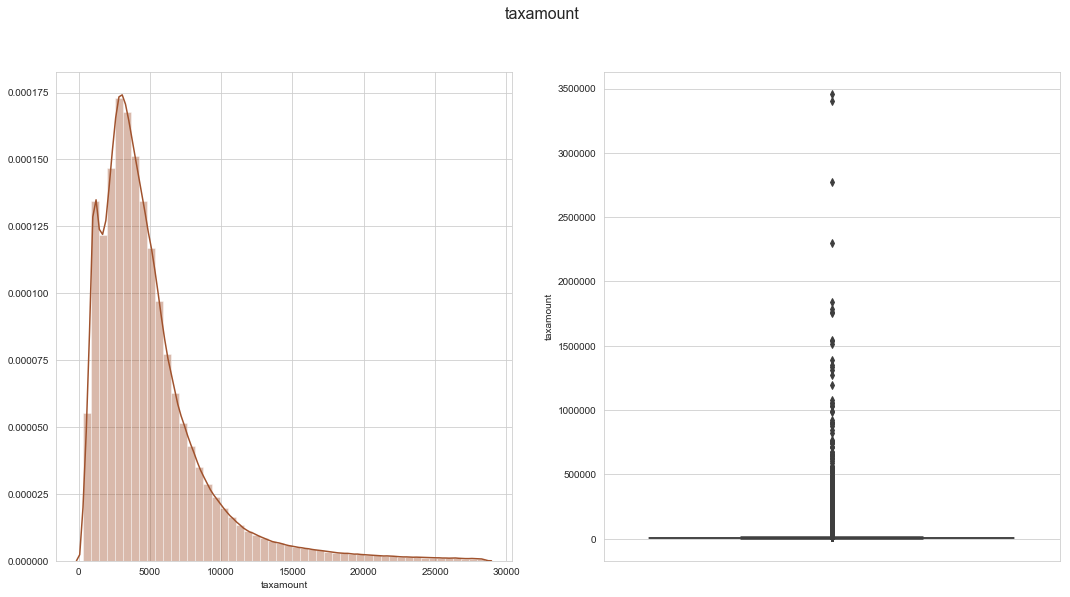

In [17]:
### Continuous variable plots
for col in continuous:
    values = data[col].dropna()
    lower = np.percentile(values, 1)
    upper = np.percentile(values, 99)
    fig = plt.figure(figsize=(18,9));
    sns.distplot(values[(values>lower) & (values<upper)], color='Sienna', ax = plt.subplot(121));
    sns.boxplot(y=values, color='Sienna', ax = plt.subplot(122));
    plt.suptitle(col, fontsize=16)       

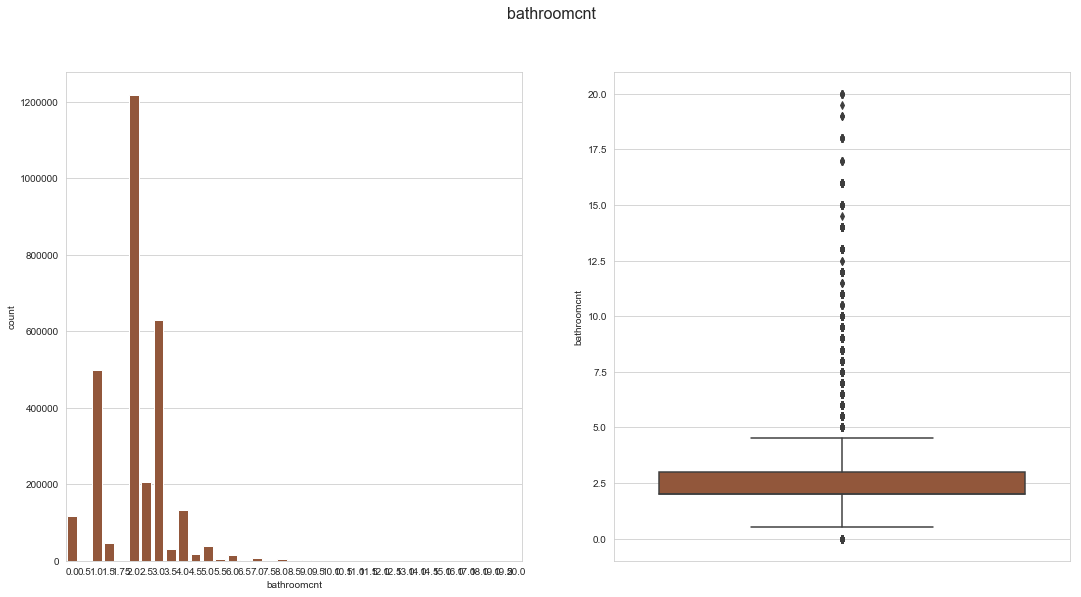

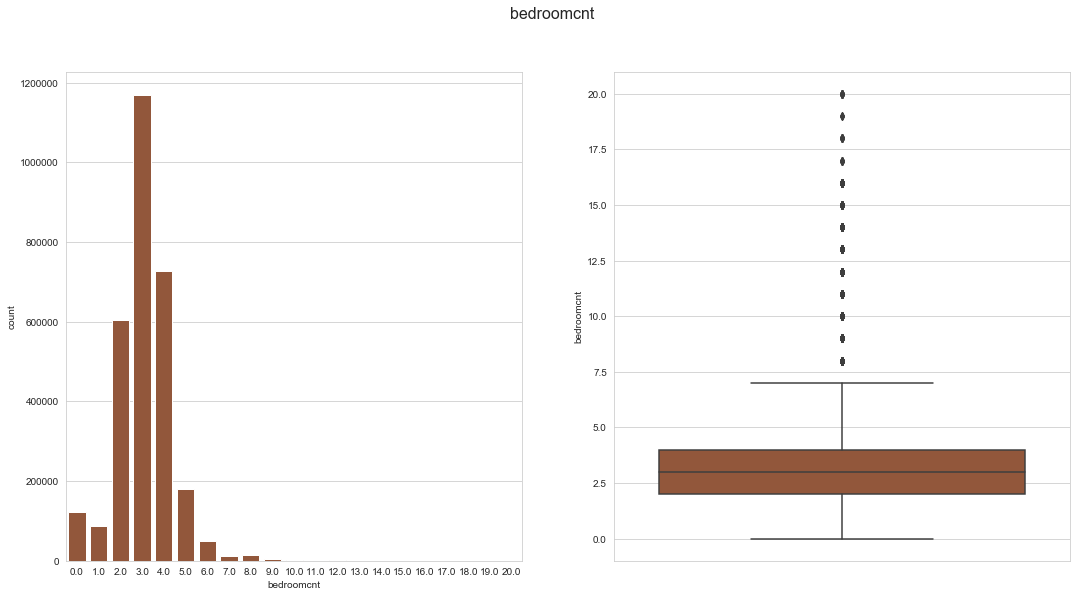

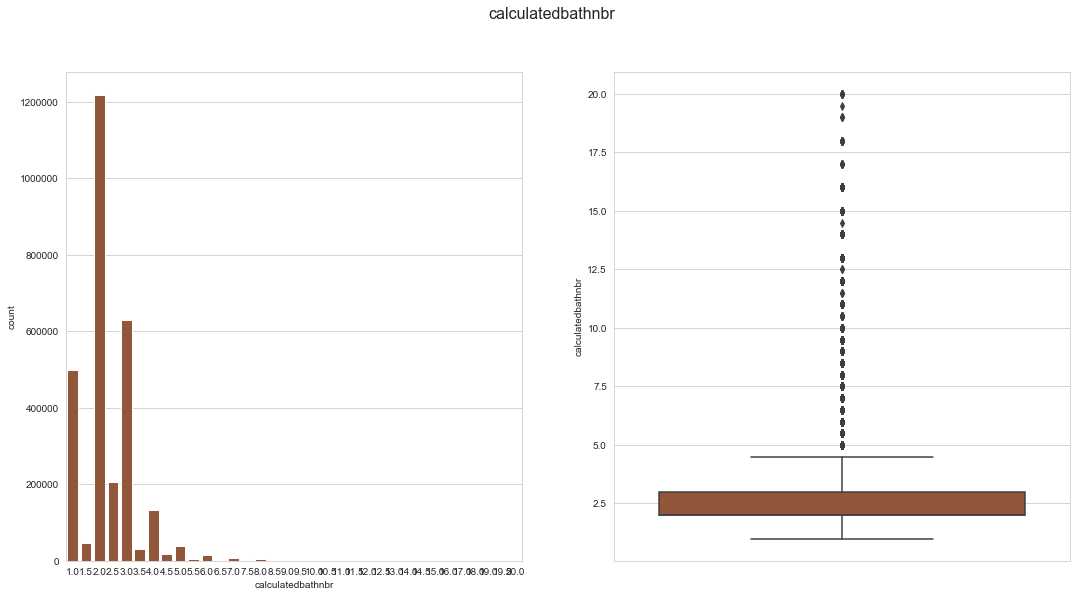

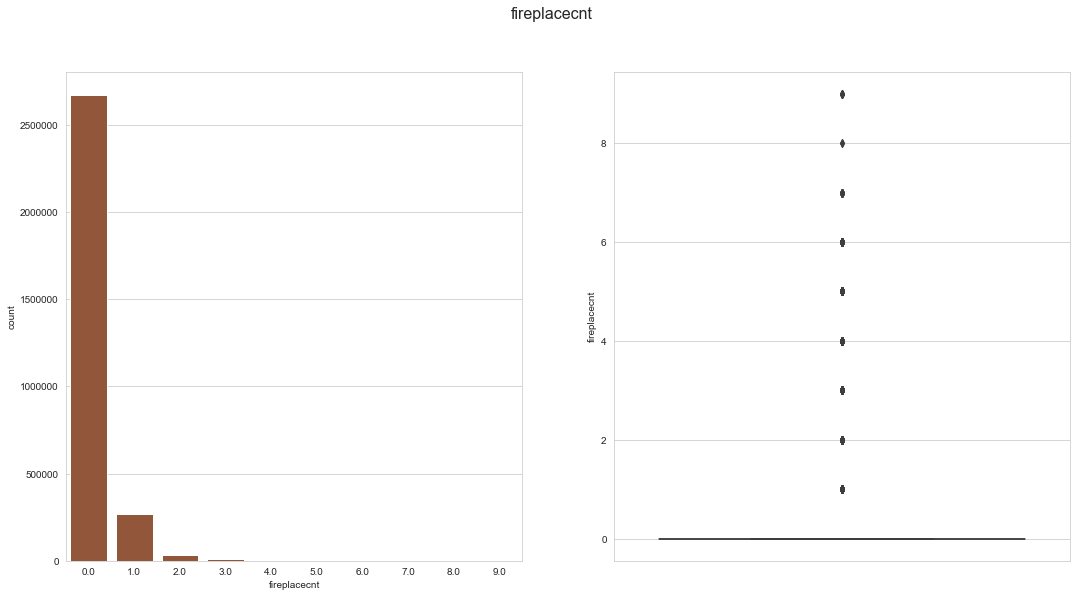

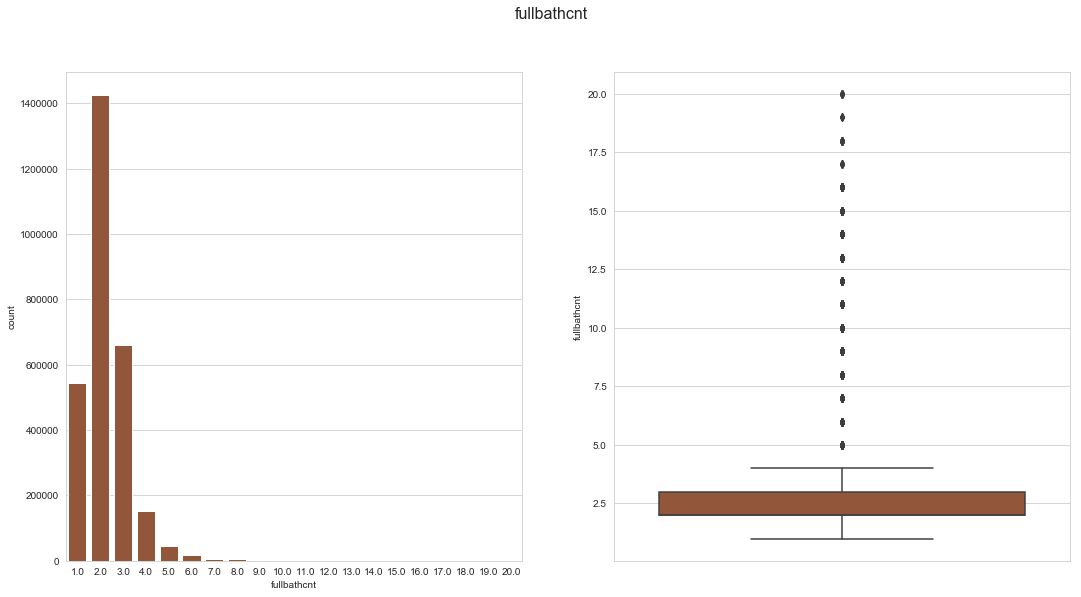

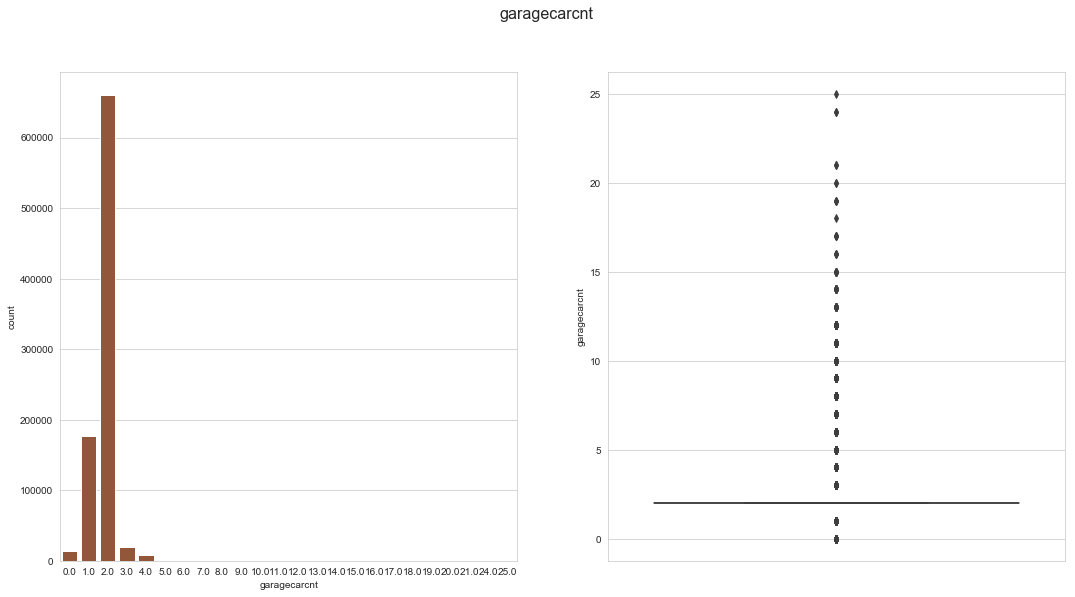

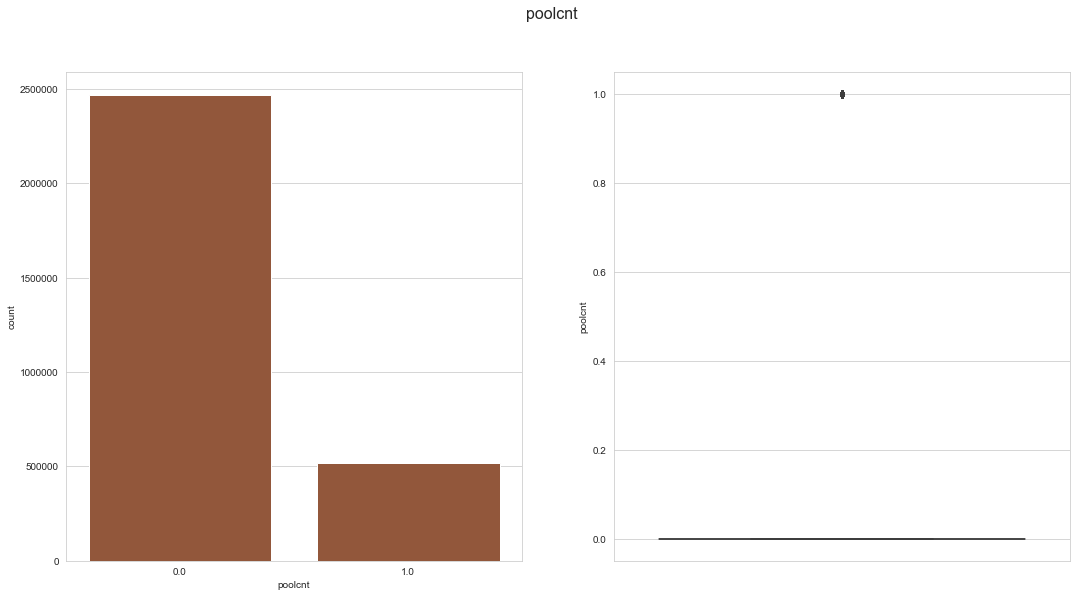

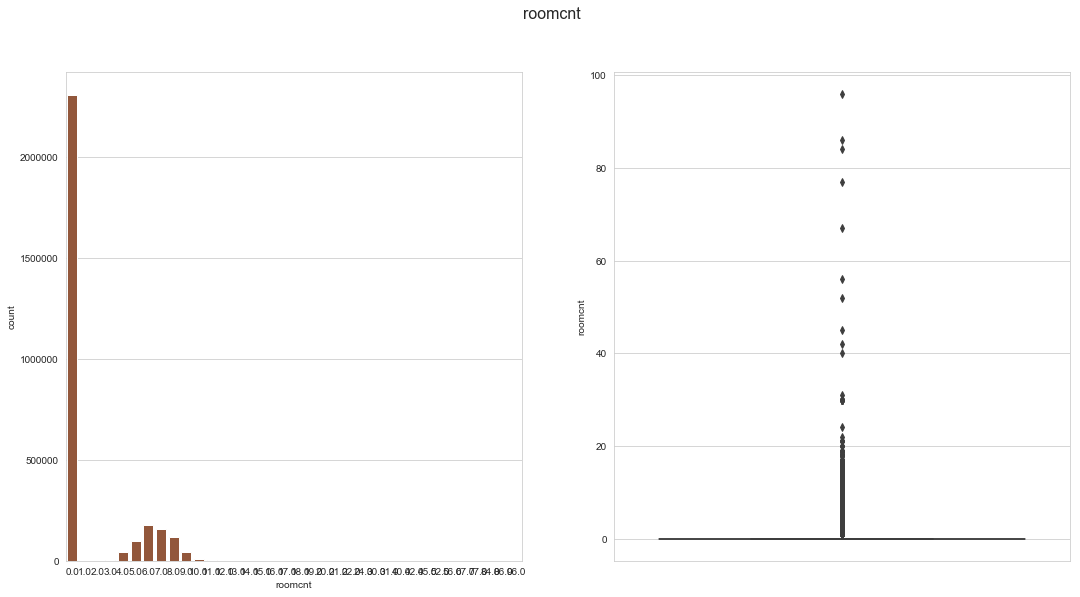

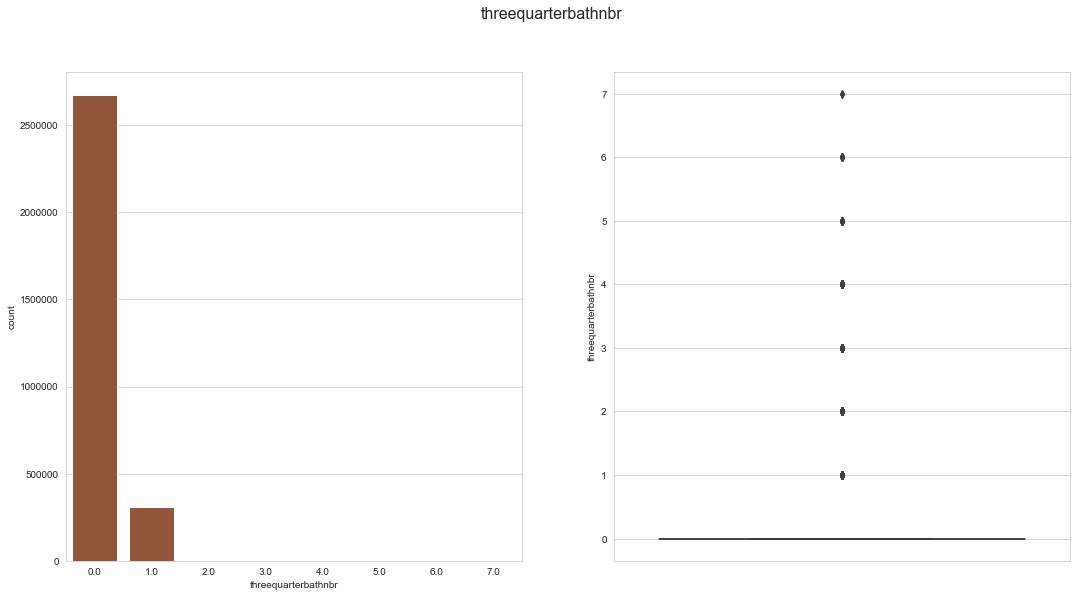

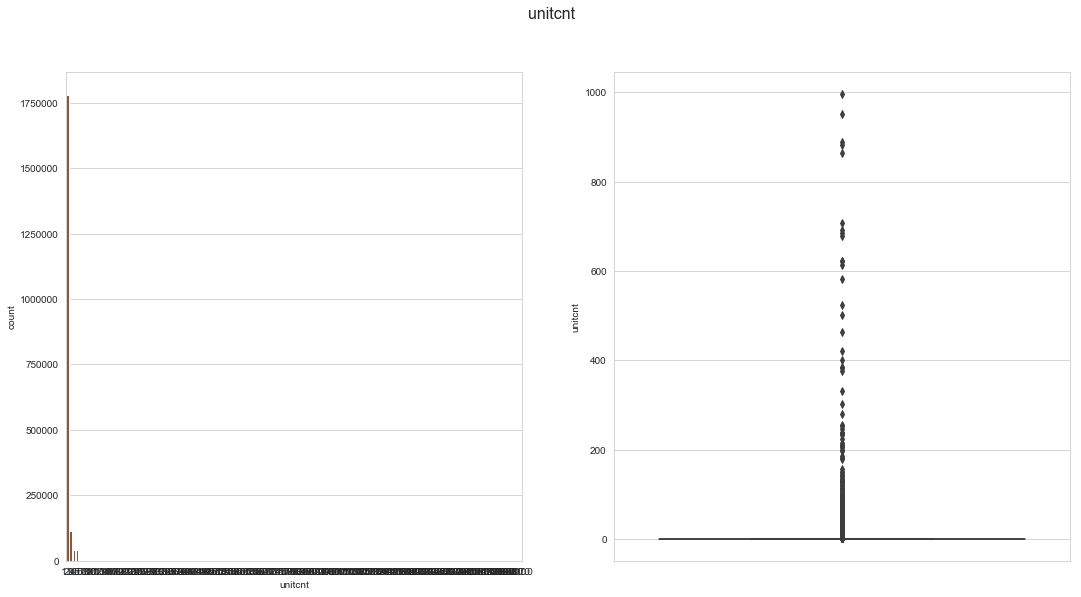

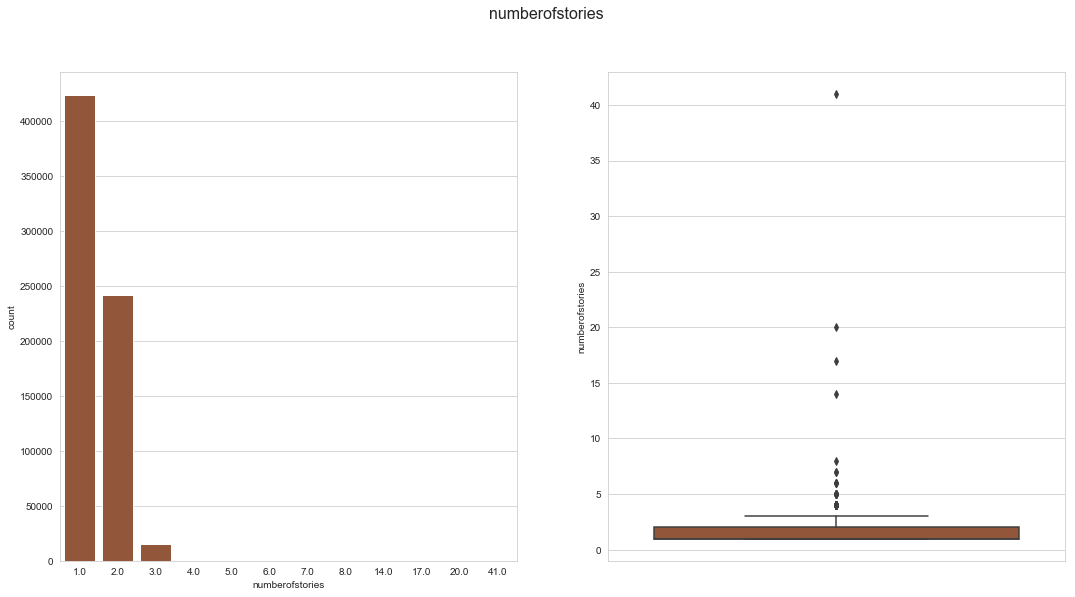

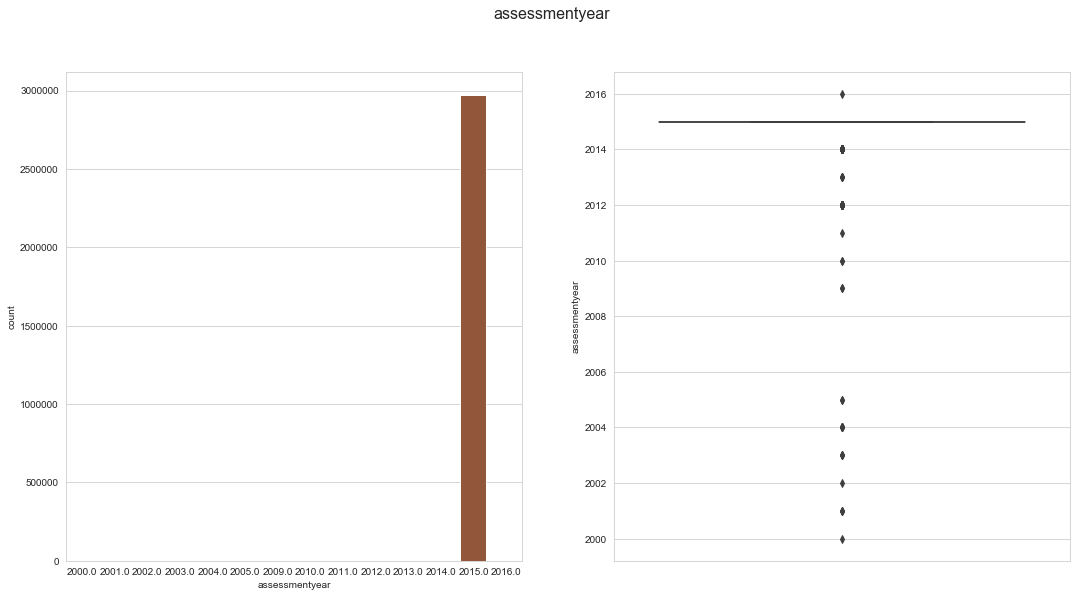

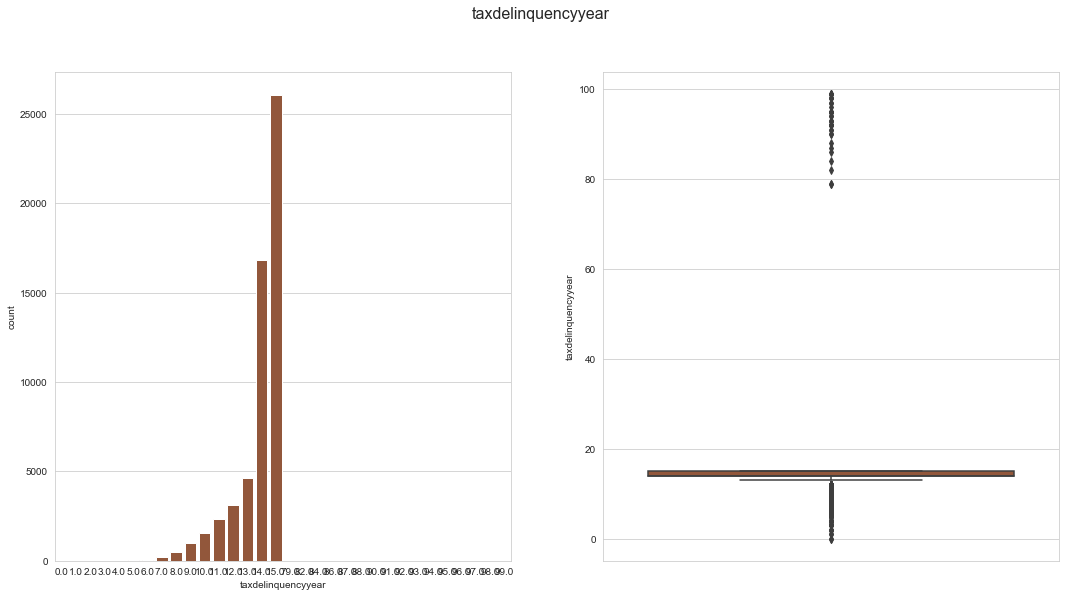

In [18]:
### Discrete variable plots
NanAsZero = ['fireplacecnt', 'poolcnt', 'threequarterbathnbr']
for col in discrete:
    if col in NanAsZero:
        data[col].fillna(0, inplace=True)
    values = data[col].dropna()   
    fig = plt.figure(figsize=(18,9));
    sns.countplot(x=values, color='Sienna', ax = plt.subplot(121));
    sns.boxplot(y=values, color='Sienna', ax = plt.subplot(122));
    plt.suptitle(col, fontsize=16)

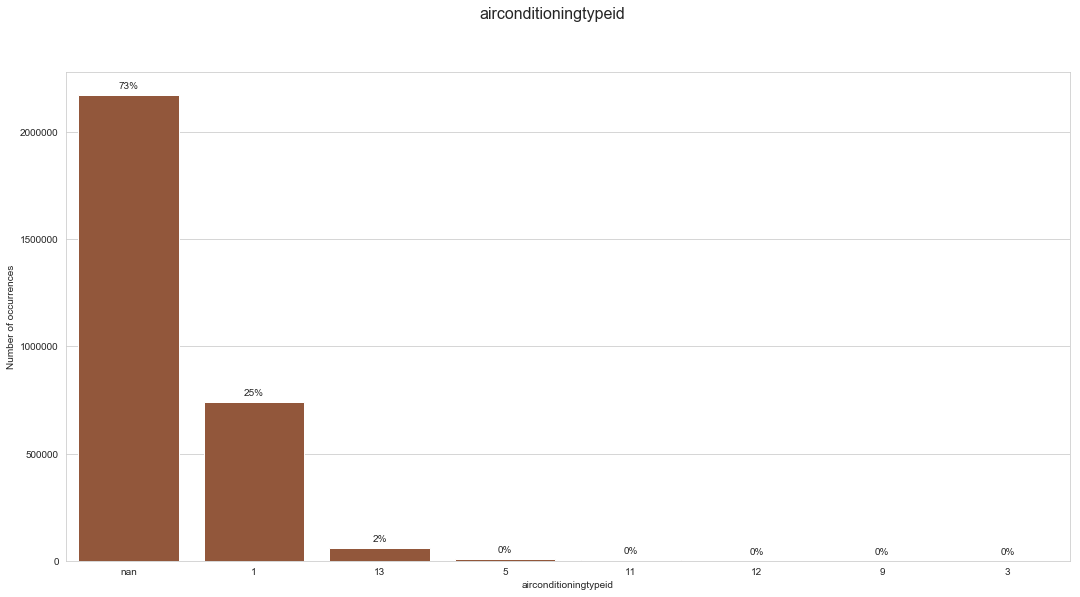

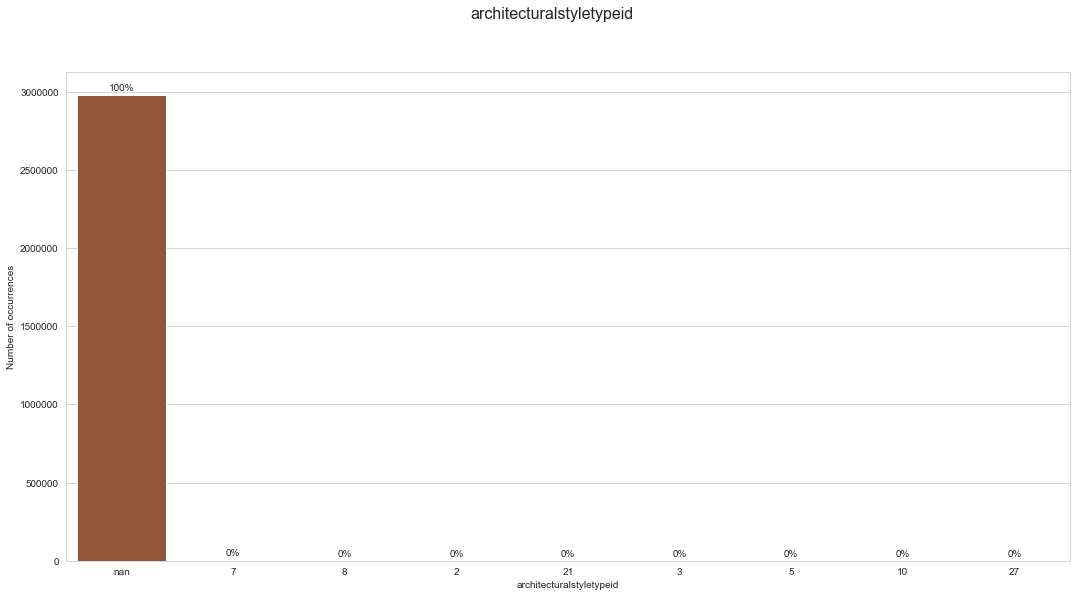

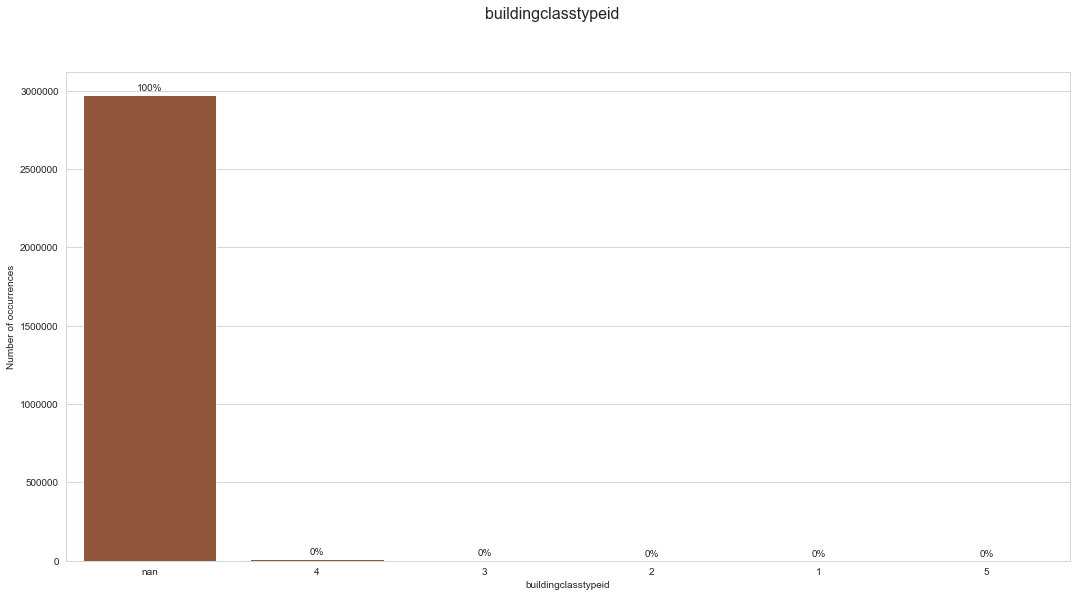

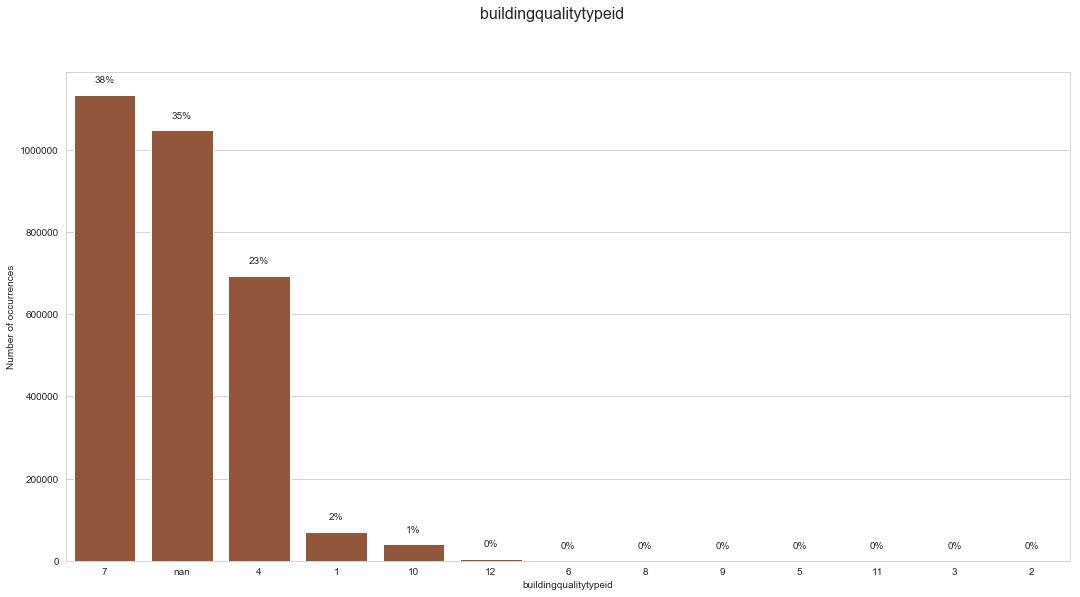

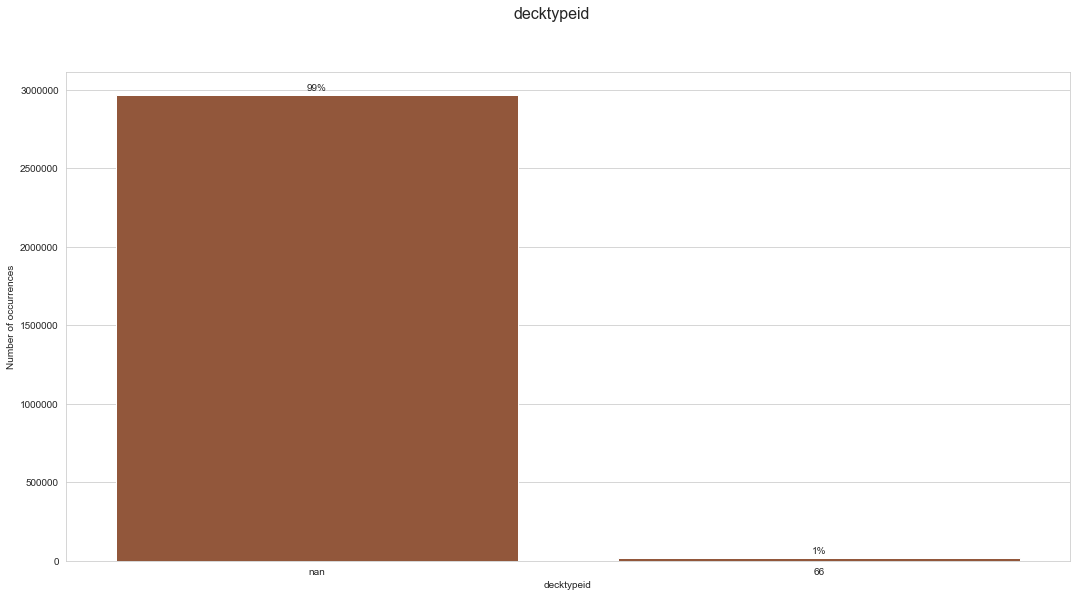

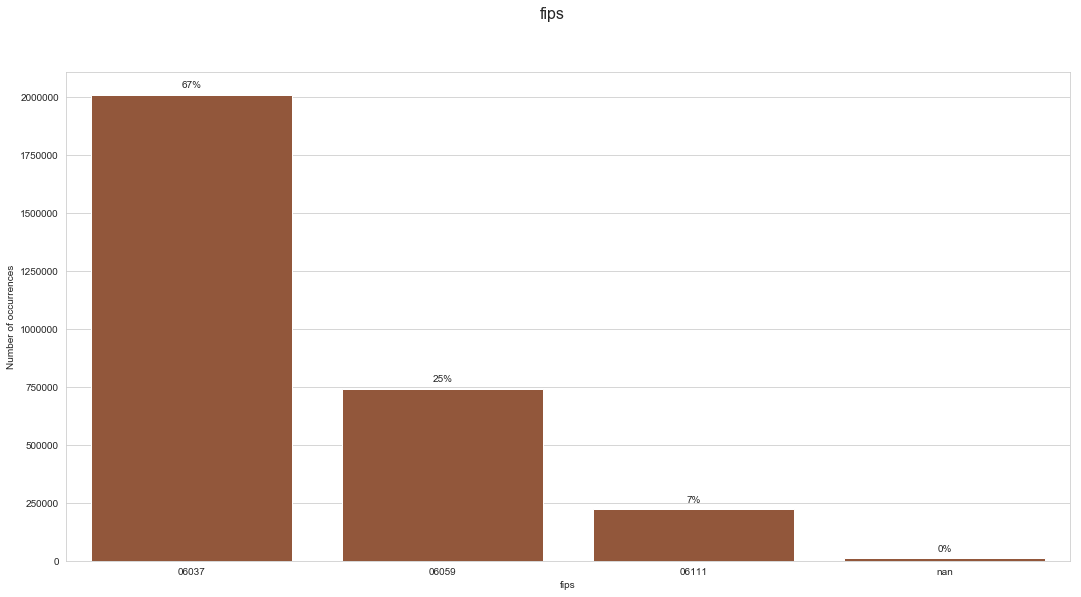

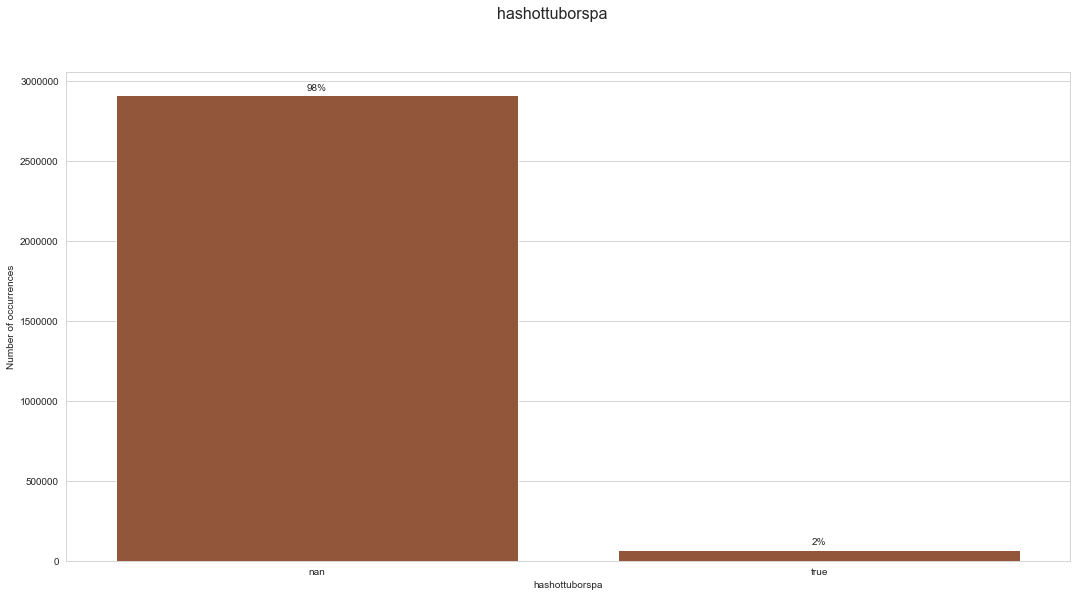

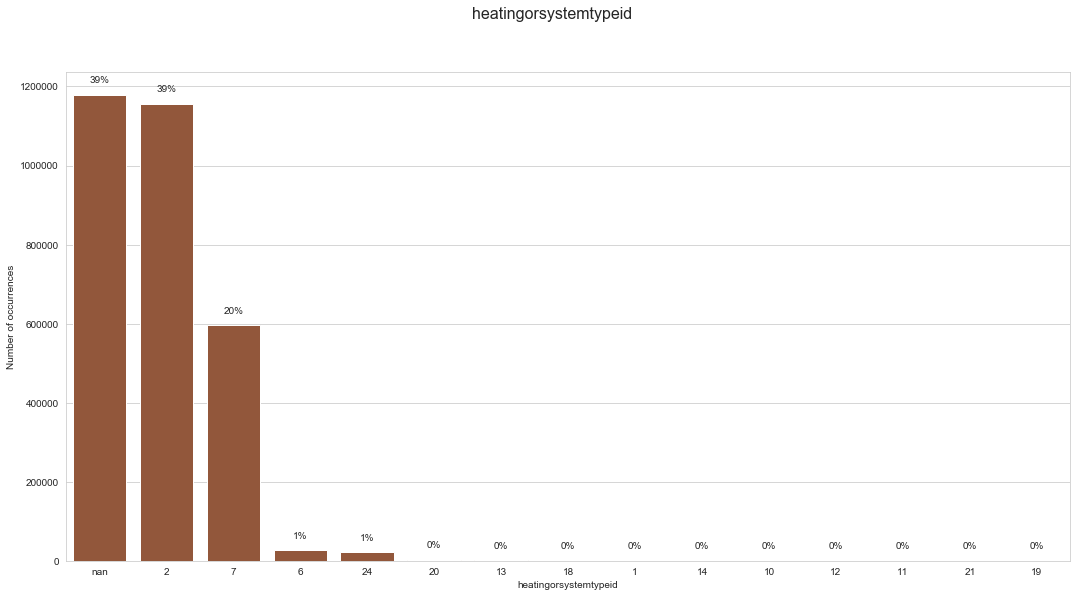

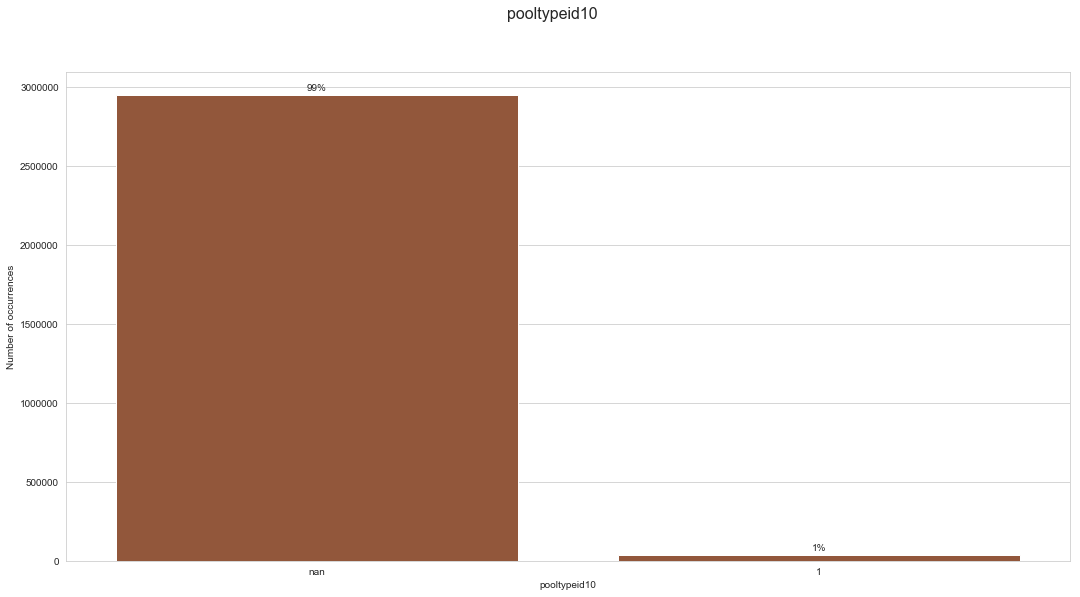

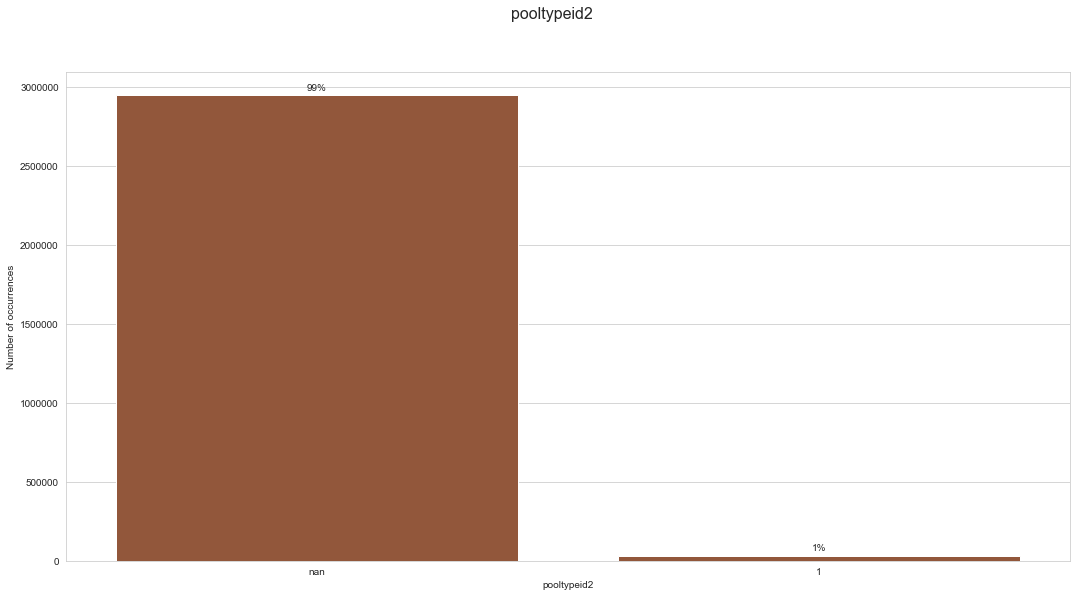

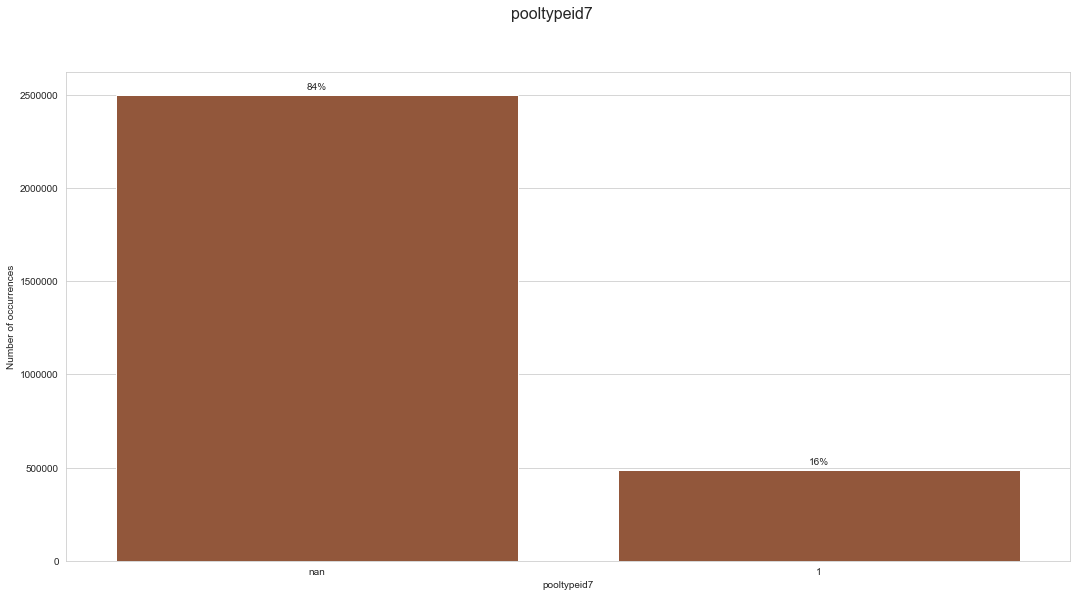

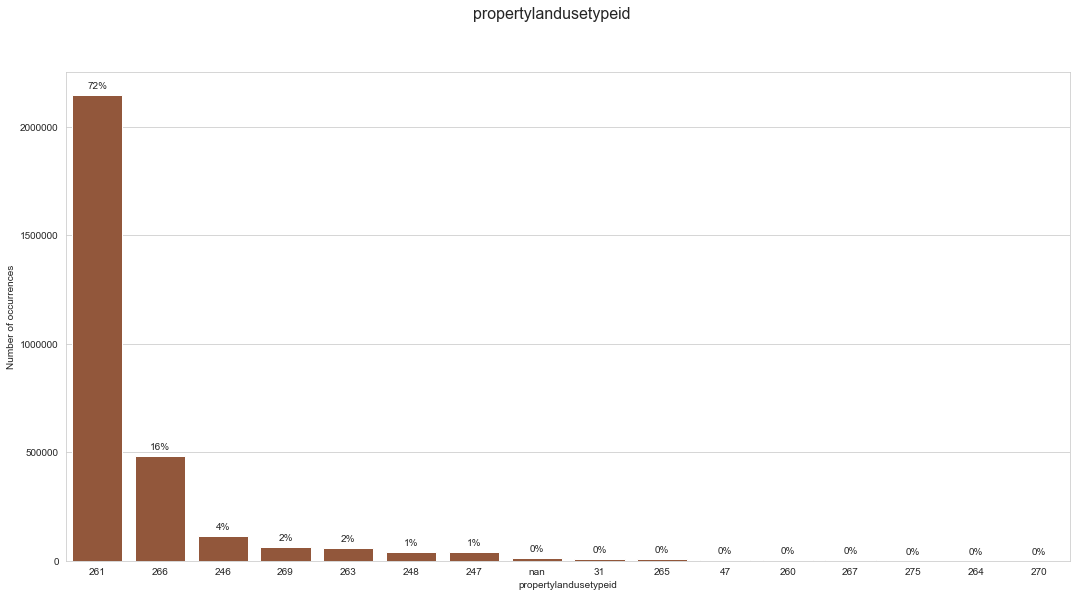

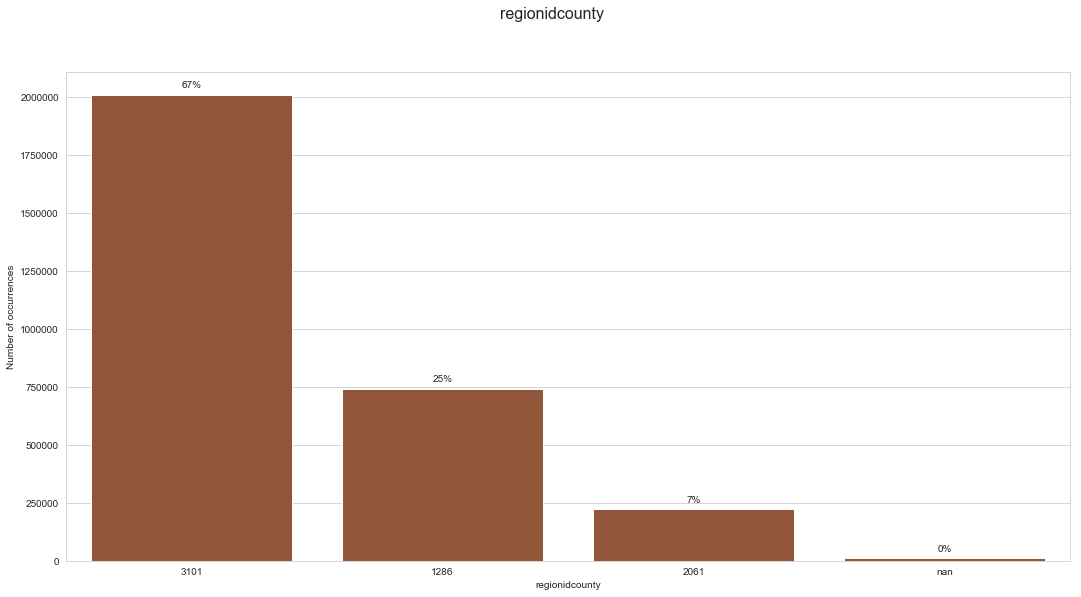

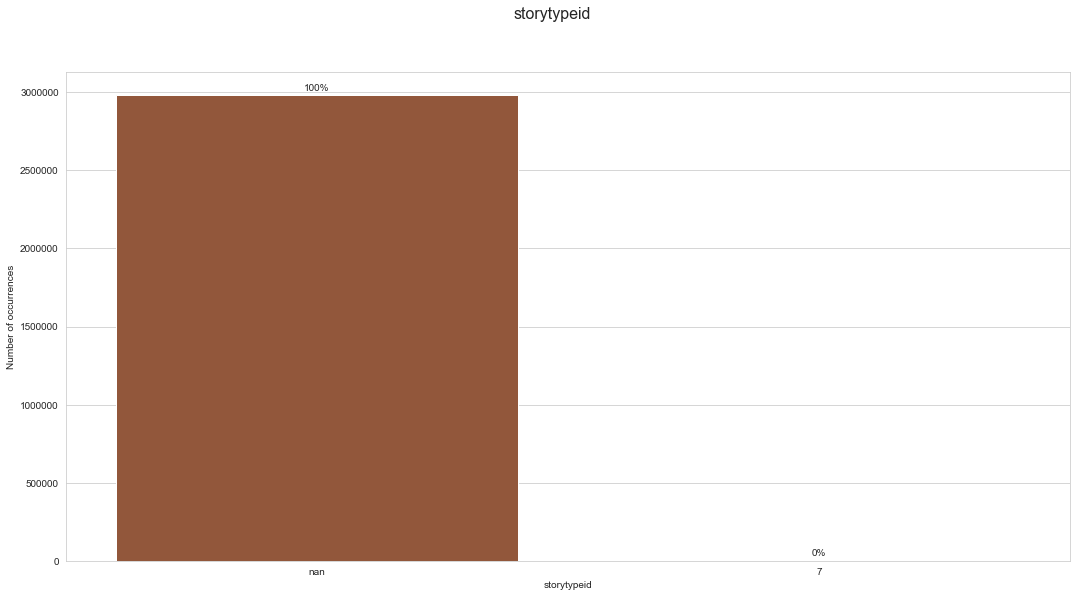

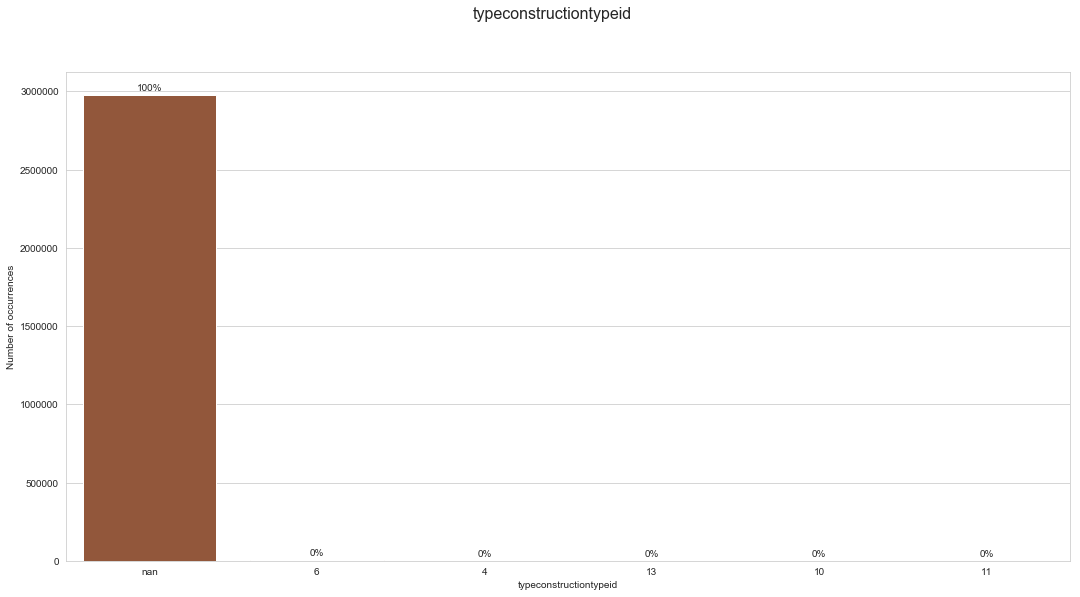

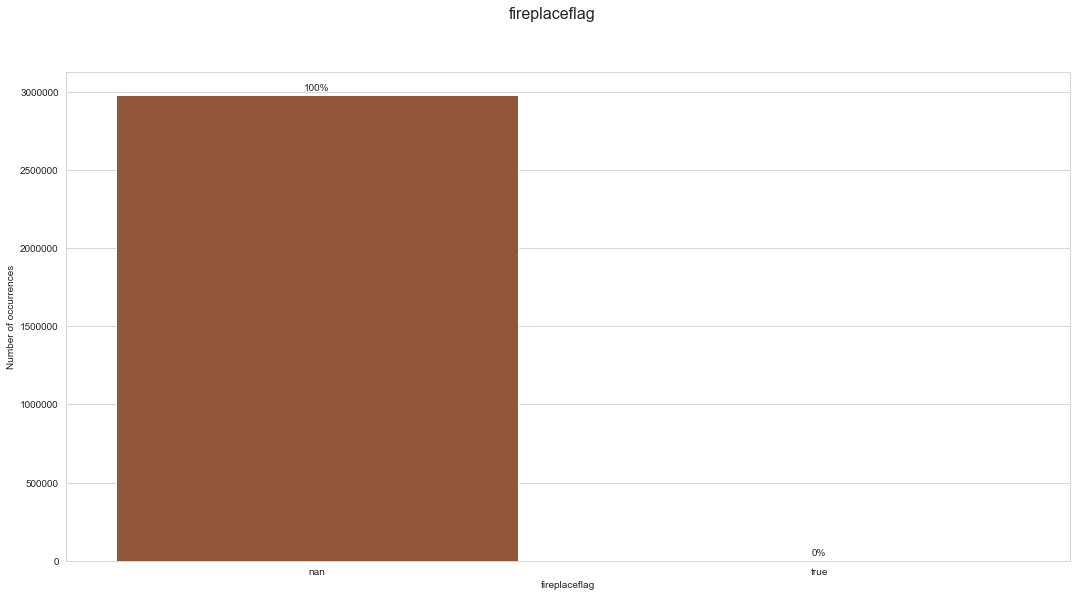

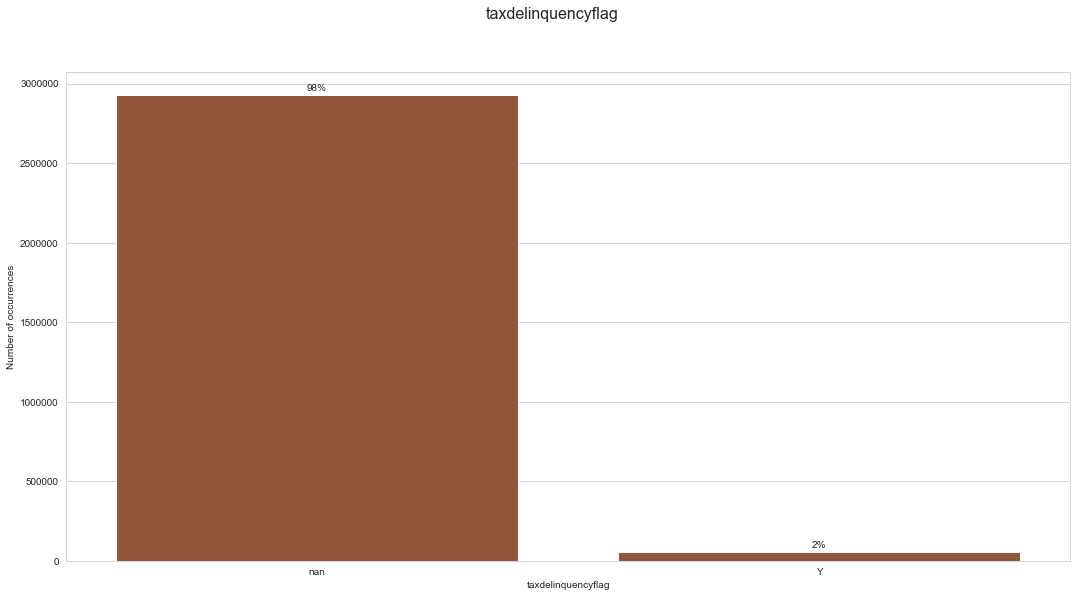

In [19]:
### Categorical variable plots
for col in objects:
    values = data[col].astype('str').value_counts(dropna=False).to_frame().reset_index()
    if len(values) > 30:
        continue
    values.columns = [col, 'counts']
    fig = plt.figure(figsize=(18,9))
    ax = sns.barplot(x=col, y='counts', color='Sienna', data=values, order=values[col]);
    plt.xlabel(col);
    plt.ylabel('Number of occurrences')
    plt.suptitle(col, fontsize=16)

    ### Adding percents over bars
    height = [p.get_height() for p in ax.patches]    
    total = sum(height)
    for i, p in enumerate(ax.patches):    
        ax.text(p.get_x()+p.get_width()/2,
                height[i]+total*0.01,
                '{:1.0%}'.format(height[i]/total),
                ha="center")    

Now I'll merge properties and train tables to get data for houses sold in 2016 only. That's why we have less row in new dataset. 

In [21]:
### Reading train file
errors = pd.read_csv('train_2016_v2.csv', parse_dates=['transactiondate'])
errors.head()

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


In [22]:
#### Merging tables
data_sold = data.merge(errors, how='inner', on='parcelid')
data_sold.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,transactiondate
0,17073783,NaN,NaN,NaN,2.5,3.0,NaN,NaN,2.5,NaN,...,115087.0,191811.0,2015.0,76724.0,2015.06,NaN,NaN,61110022003007,0.0953,2016-01-27
1,17088994,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,NaN,...,143809.0,239679.0,2015.0,95870.0,2581.30,NaN,NaN,61110015031002,0.0198,2016-03-30
2,17100444,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,NaN,...,33619.0,47853.0,2015.0,14234.0,591.64,NaN,NaN,61110007011007,0.0060,2016-05-27
3,17102429,NaN,NaN,NaN,1.5,2.0,NaN,NaN,1.5,NaN,...,45609.0,62914.0,2015.0,17305.0,682.78,NaN,NaN,61110008002013,-0.0566,2016-06-07
4,17109604,NaN,NaN,NaN,2.5,4.0,NaN,NaN,2.5,NaN,...,277000.0,554000.0,2015.0,277000.0,5886.92,NaN,NaN,61110014021007,0.0573,2016-08-08


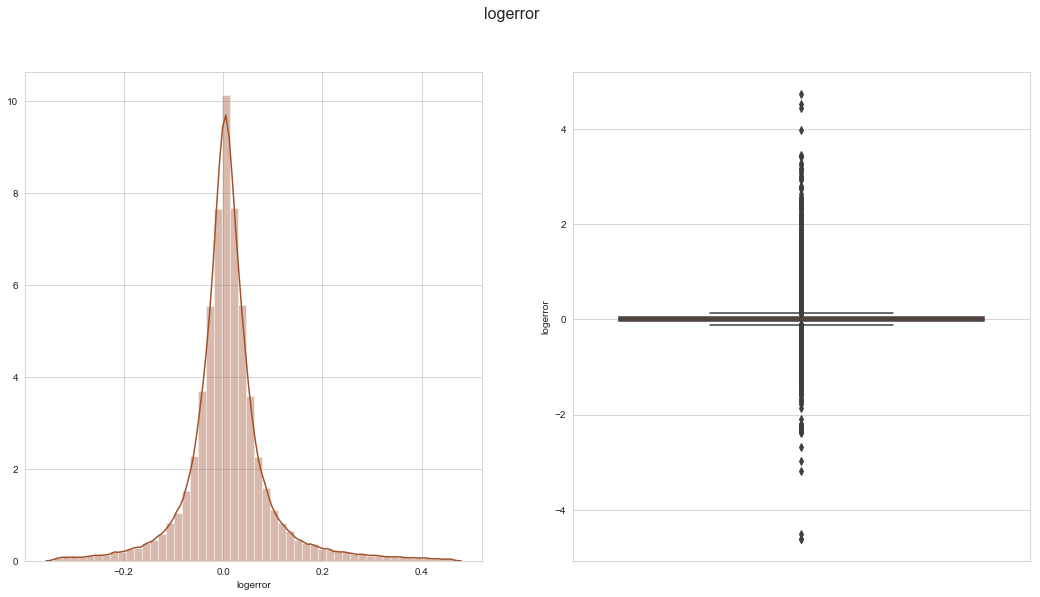

In [23]:
### Checking logerror
col = 'logerror'

values = data_sold[col].dropna()
lower = np.percentile(values, 1)
upper = np.percentile(values, 99)
fig = plt.figure(figsize=(18,9));
sns.distplot(values[(values>lower) & (values<upper)], color='Sienna', ax = plt.subplot(121));
sns.boxplot(y=values, color='Sienna', ax = plt.subplot(122));
plt.suptitle(col, fontsize=16);

In [24]:
### Adding some new features from transactiondate
data_sold['month'] = data_sold['transactiondate'].dt.month
data_sold['day_of_week'] = data_sold['transactiondate'].dt.weekday_name
data_sold['week_number'] = data_sold['transactiondate'].dt.week
data_sold.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,transactiondate,month,day_of_week,week_number
0,17073783,NaN,NaN,NaN,2.5,3.0,NaN,NaN,2.5,NaN,...,76724.0,2015.06,NaN,NaN,61110022003007,0.0953,2016-01-27,1,Wednesday,4
1,17088994,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,NaN,...,95870.0,2581.30,NaN,NaN,61110015031002,0.0198,2016-03-30,3,Wednesday,13
2,17100444,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,NaN,...,14234.0,591.64,NaN,NaN,61110007011007,0.0060,2016-05-27,5,Friday,21
3,17102429,NaN,NaN,NaN,1.5,2.0,NaN,NaN,1.5,NaN,...,17305.0,682.78,NaN,NaN,61110008002013,-0.0566,2016-06-07,6,Tuesday,23
4,17109604,NaN,NaN,NaN,2.5,4.0,NaN,NaN,2.5,NaN,...,277000.0,5886.92,NaN,NaN,61110014021007,0.0573,2016-08-08,8,Monday,32


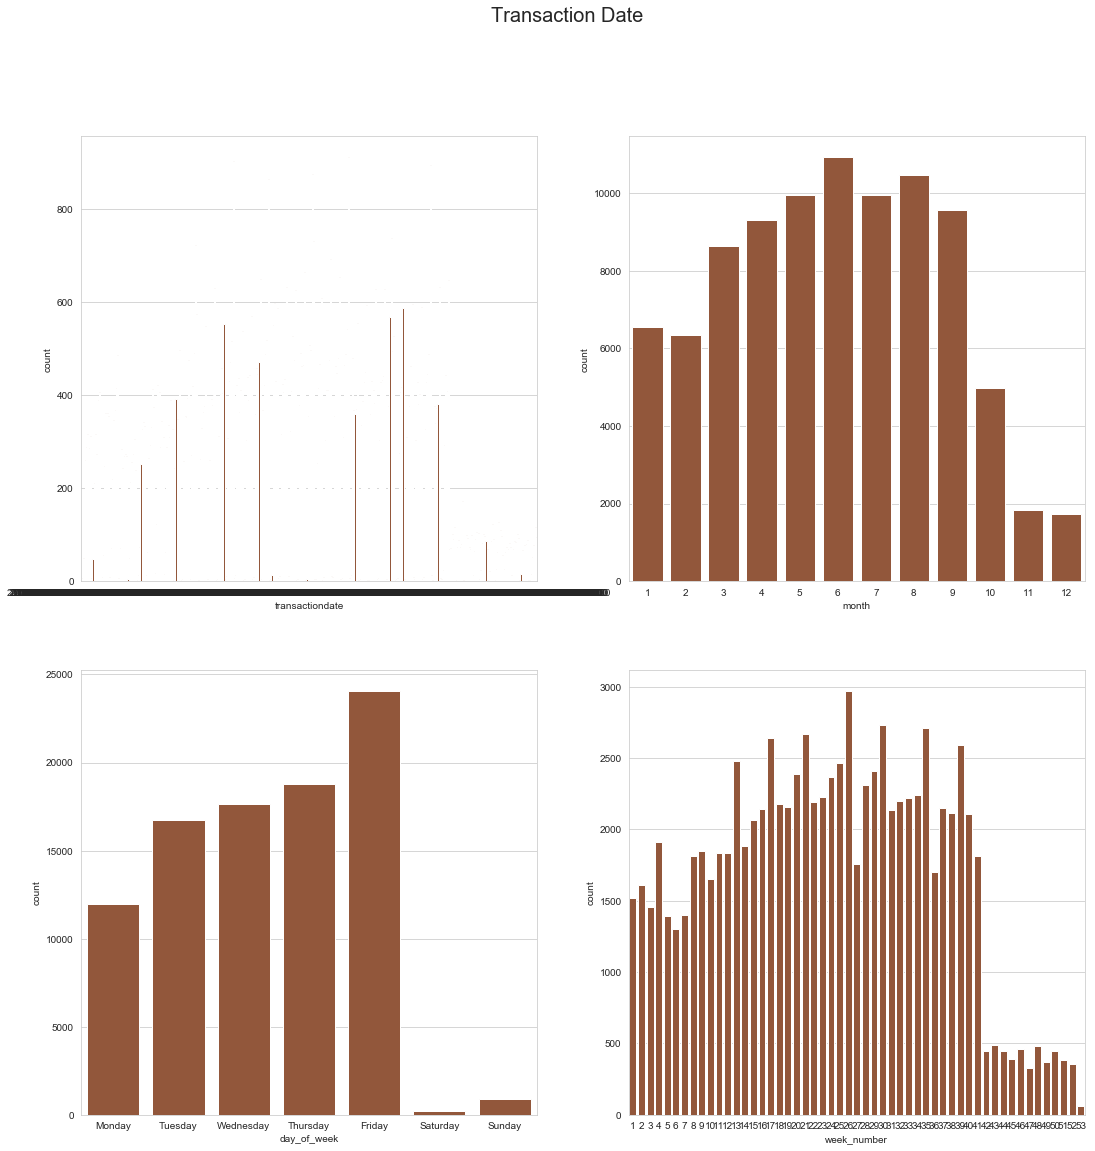

In [25]:
### Scrutinizing transactiondate
fig = plt.figure(figsize=(18, 18));
sns.countplot(x='transactiondate', color='Sienna', data=data_sold, ax = plt.subplot(221));
sns.countplot(x='month', color='Sienna', data=data_sold, ax = plt.subplot(222));
sns.countplot(x='day_of_week', color='Sienna', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday',
                                                      'Friday', 'Saturday', 'Sunday'], 
              data=data_sold, ax = plt.subplot(223));
sns.countplot(x='week_number', color='Sienna', data=data_sold, ax = plt.subplot(224));
plt.suptitle('Transaction Date', fontsize=20);

### Multivariate analysis

In [26]:
### Creating 5 equal size logerror bins 
data_sold['logerror_bin'] = pd.qcut(data_sold['logerror'], 5, 
                                    labels=['Large Negative Error', 'Medium Negative Error',
                                            'Small Error', 'Medium Positive Error',
                                            'Large Positive Error'])
print(data_sold.logerror_bin.value_counts())

Large Negative Error     18442
Small Error              18432
Medium Negative Error    17973
Large Positive Error     17947
Medium Positive Error    17481
Name: logerror_bin, dtype: int64


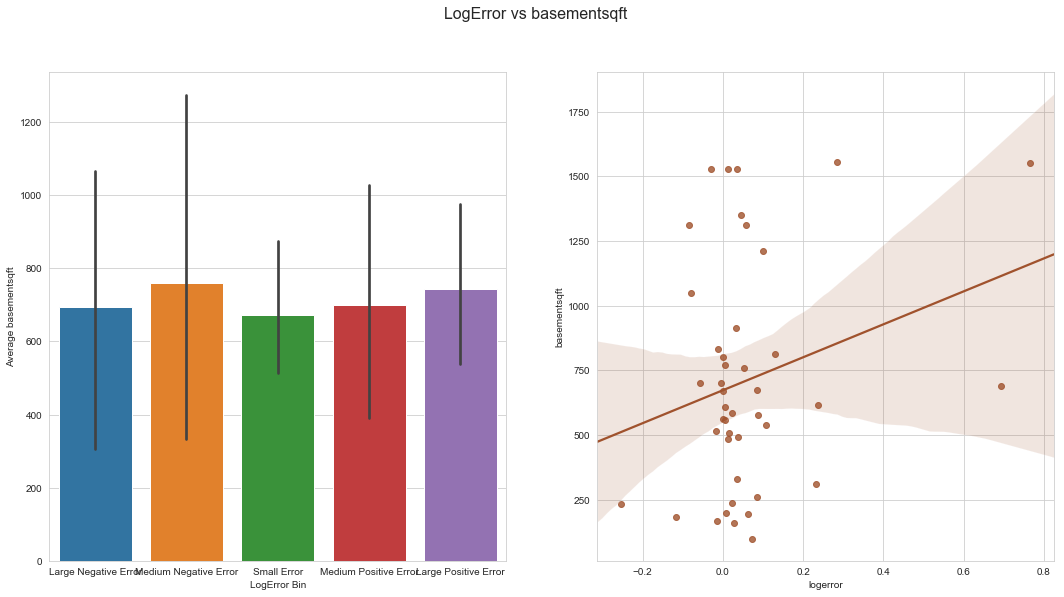

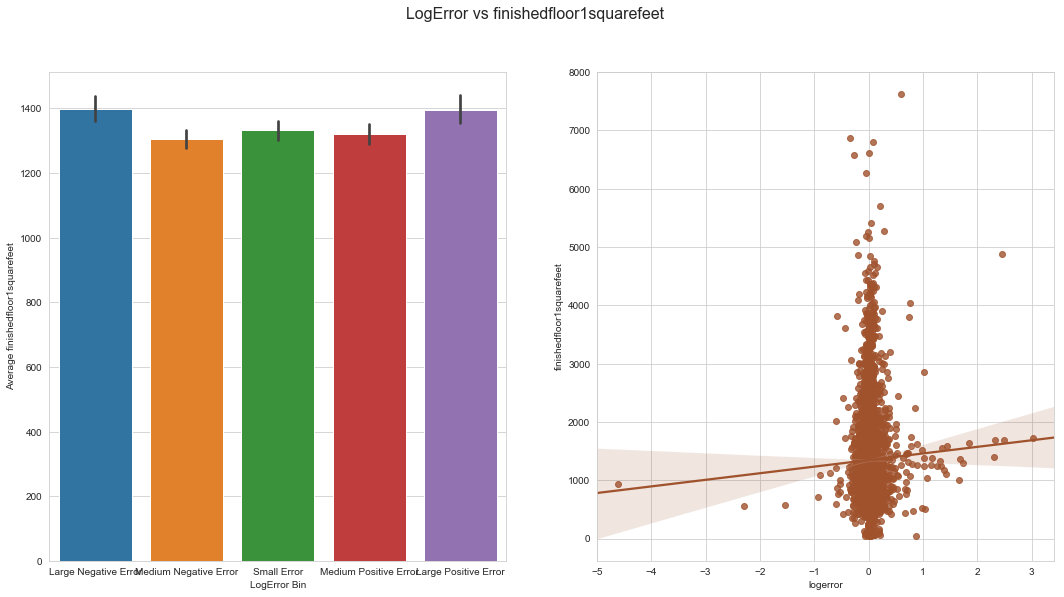

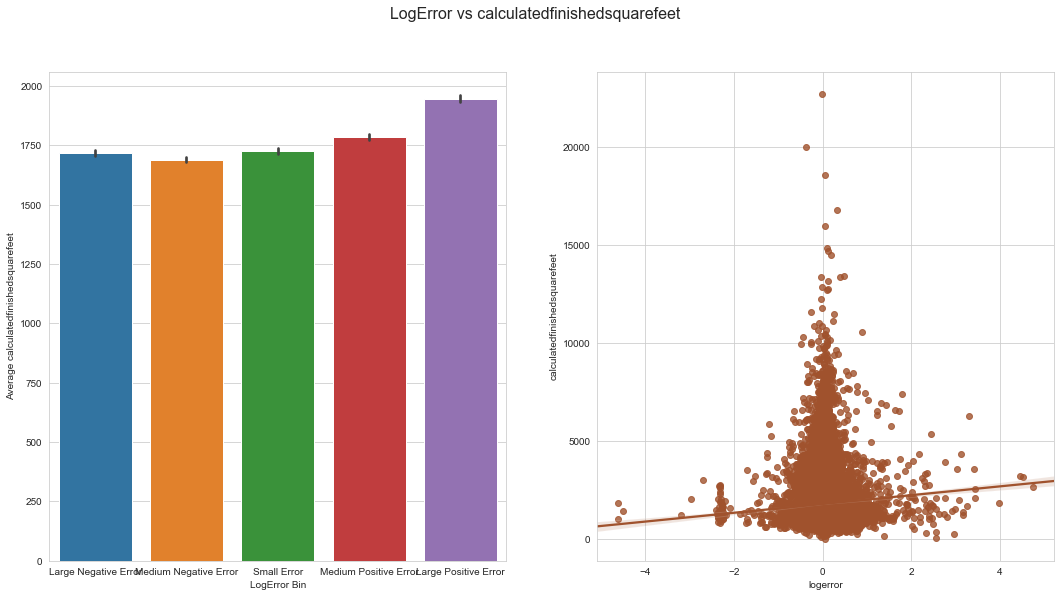

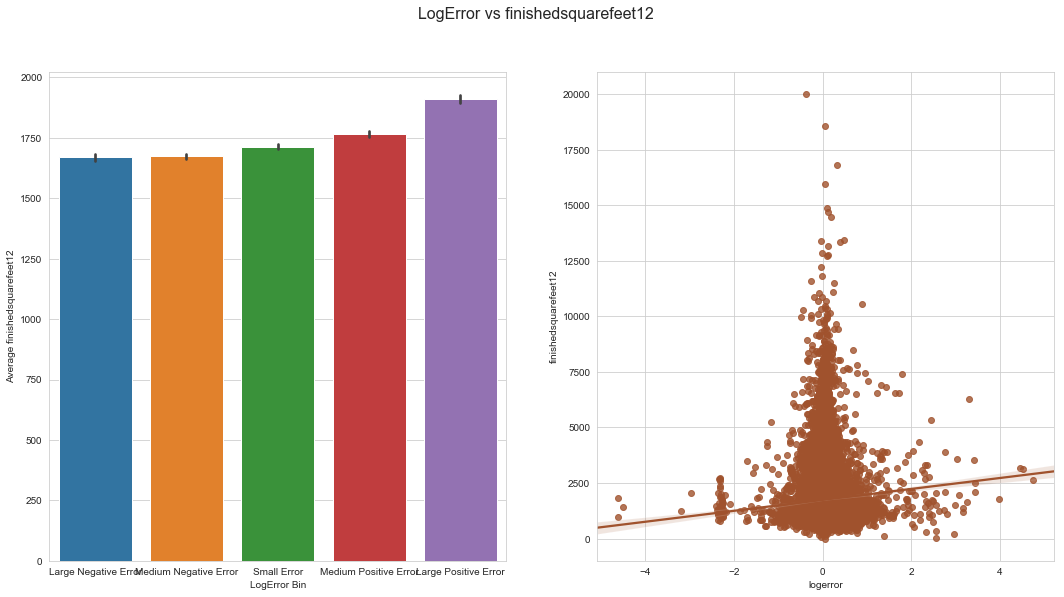

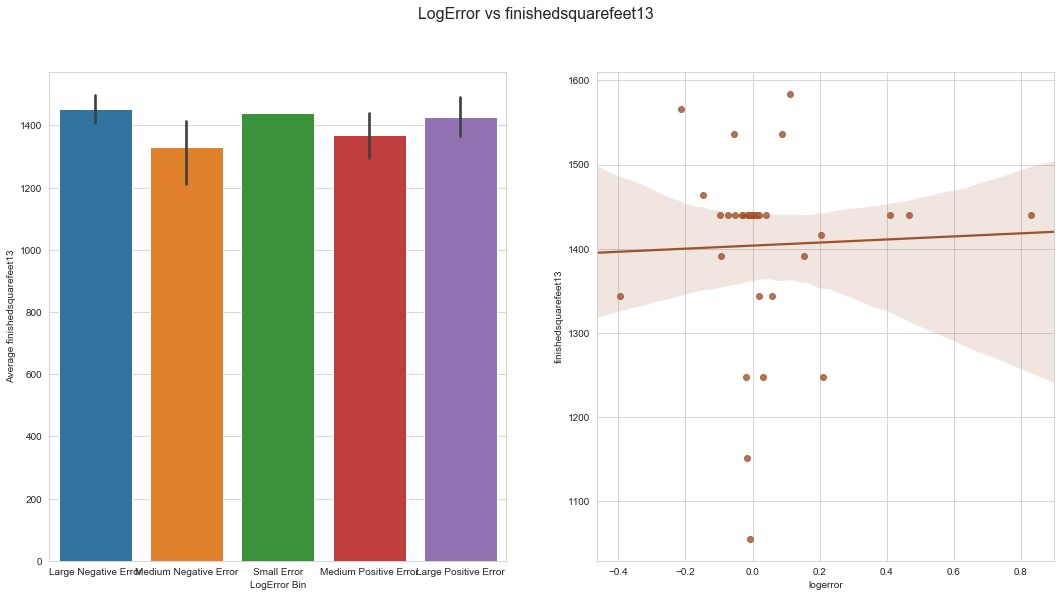

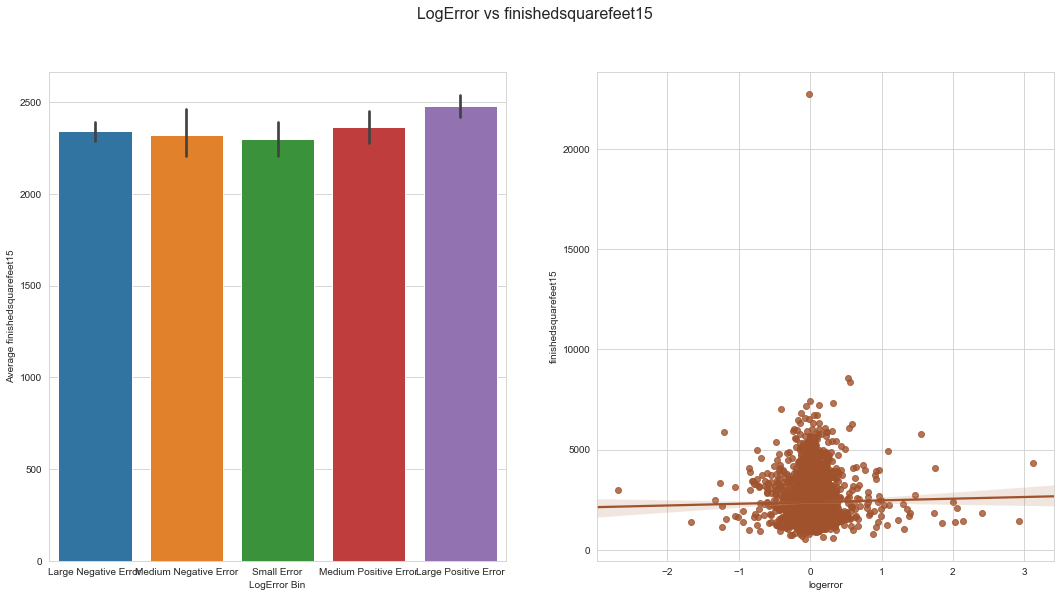

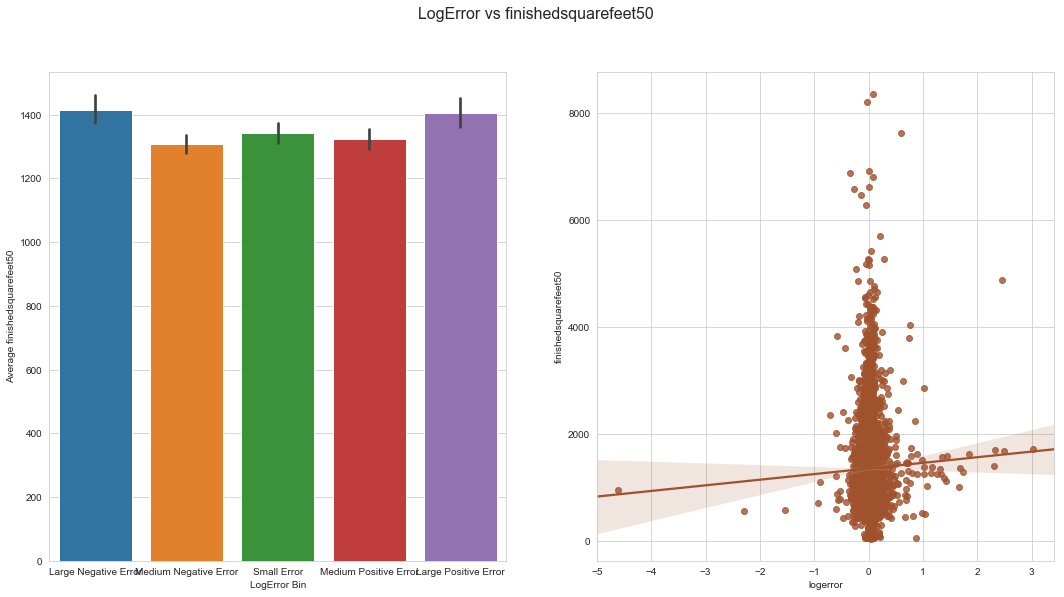

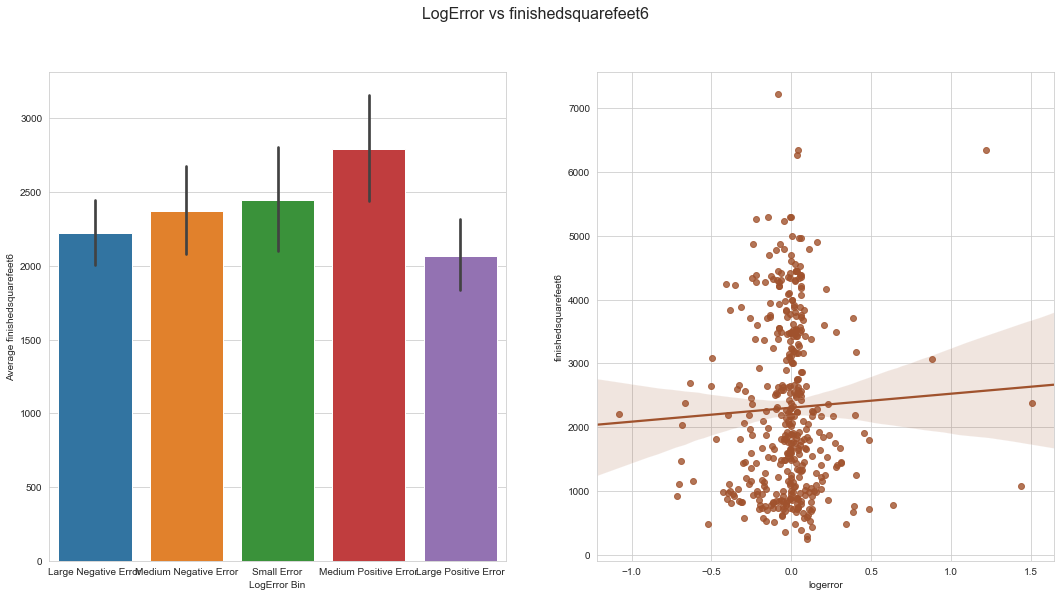

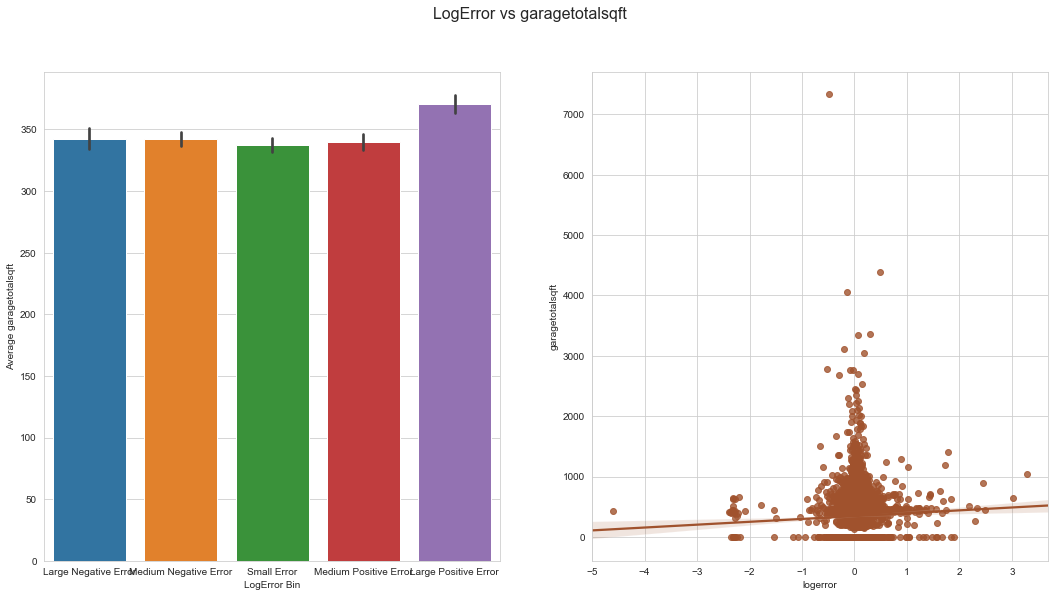

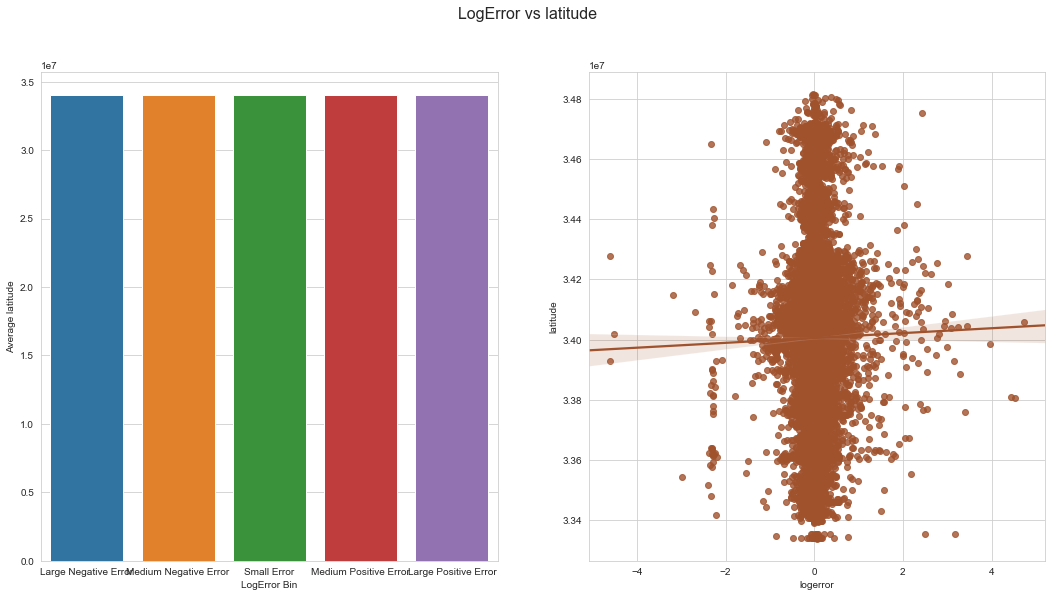

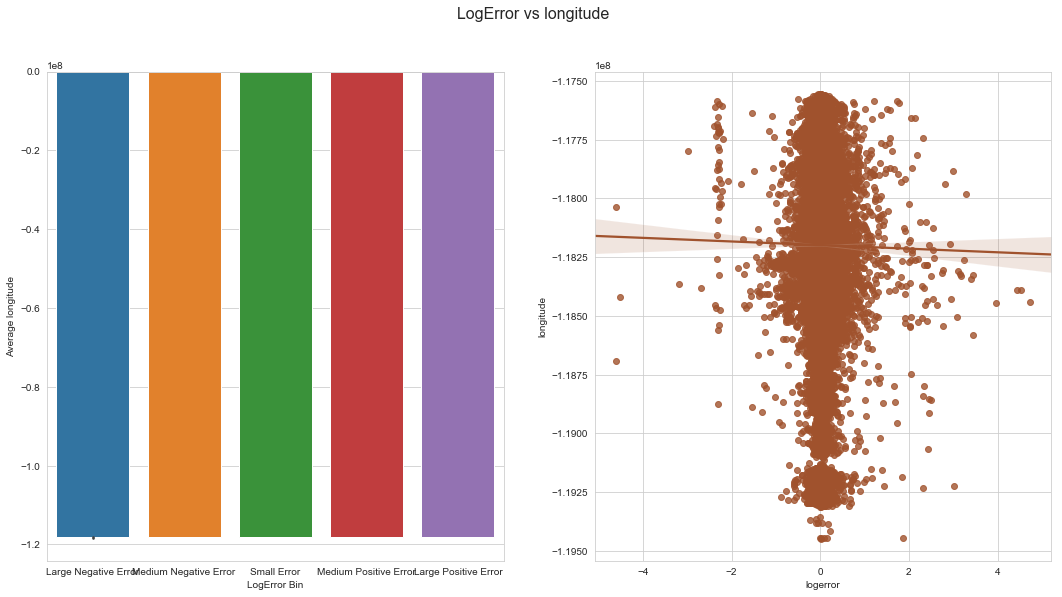

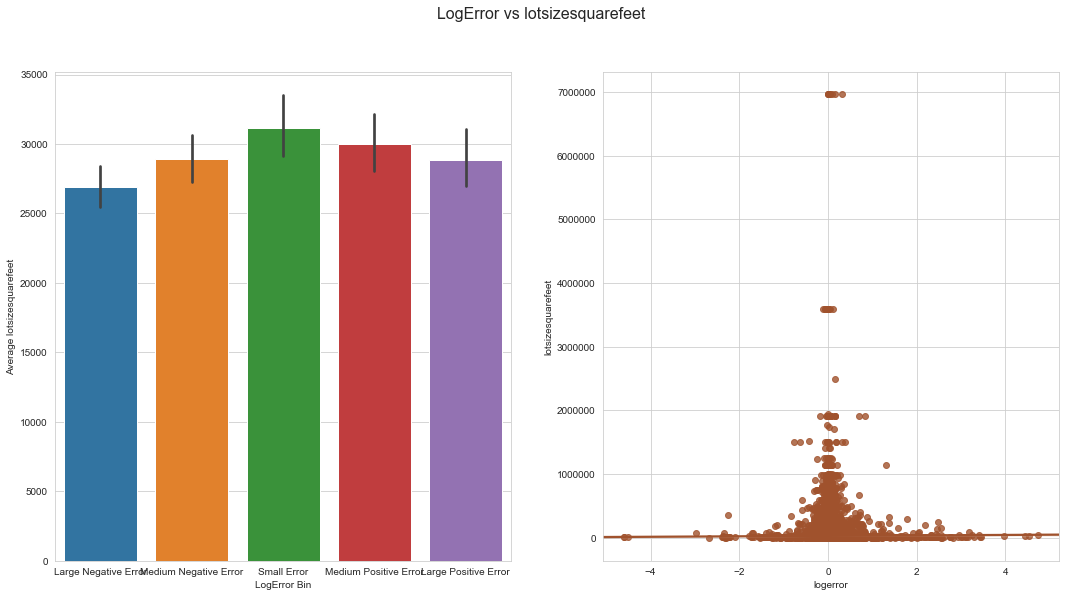

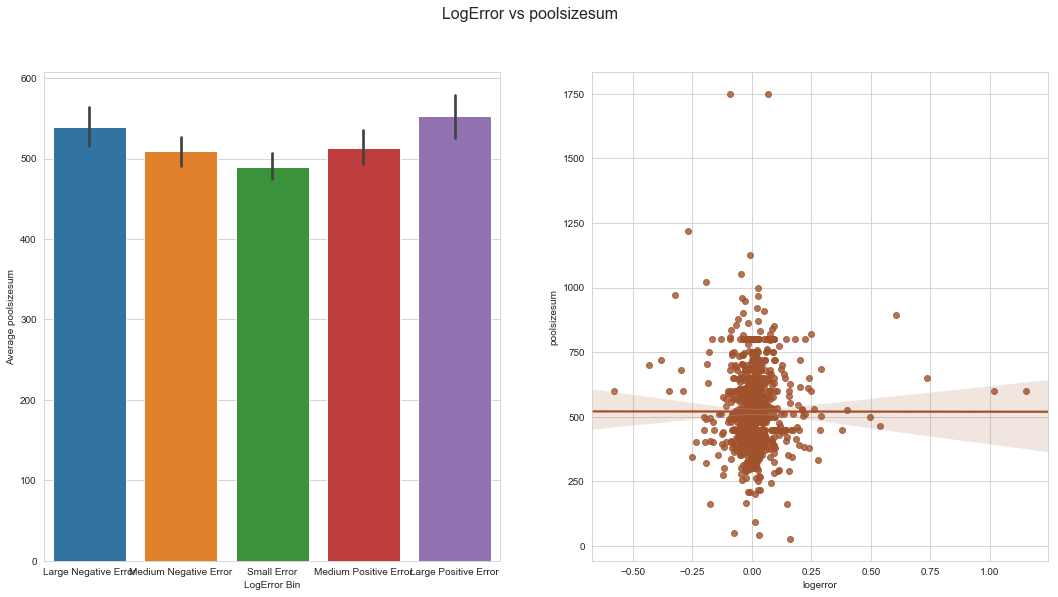

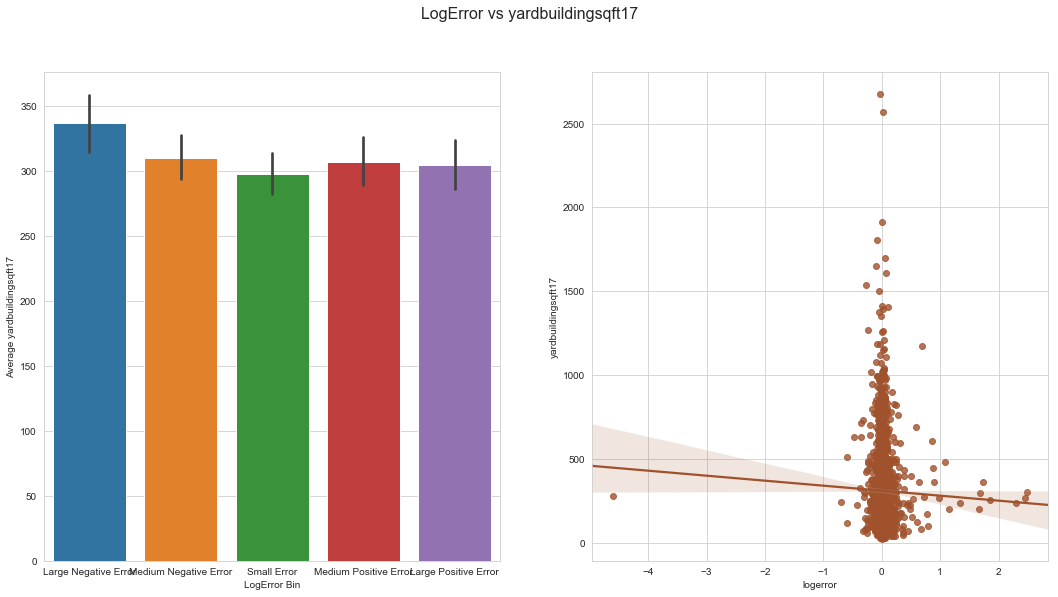

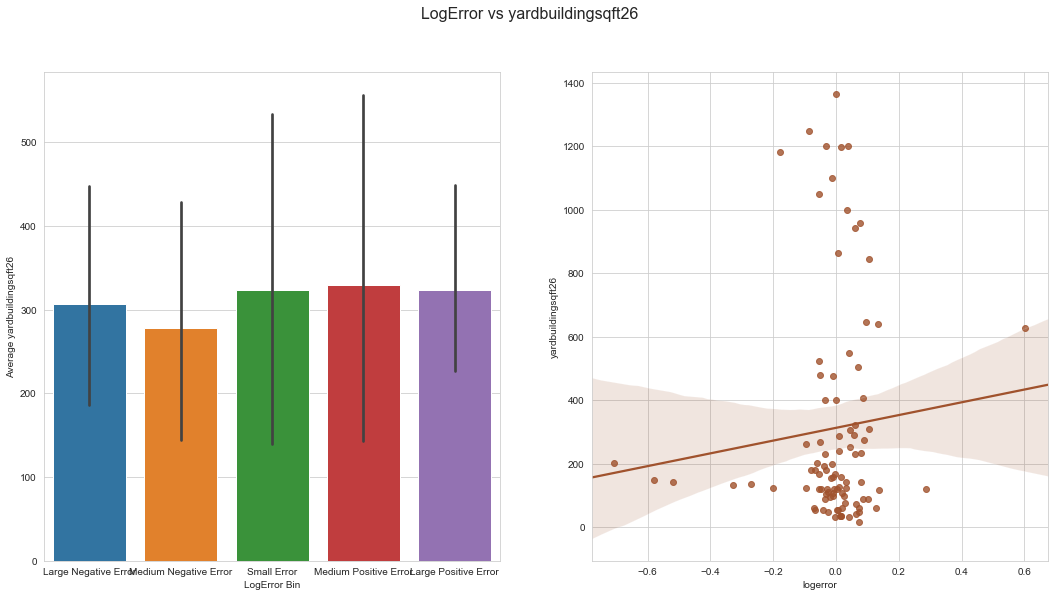

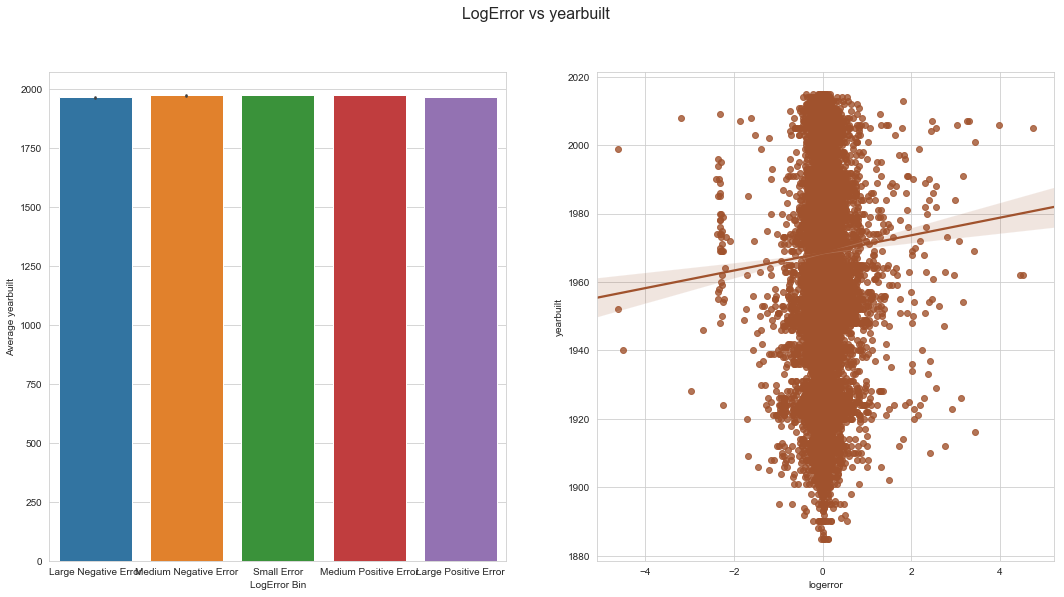

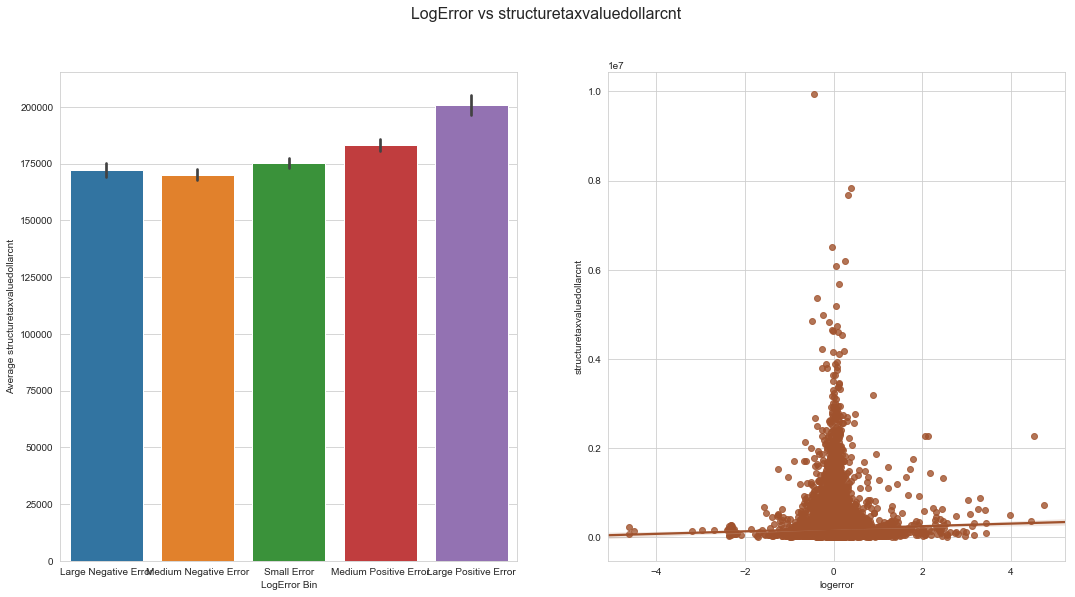

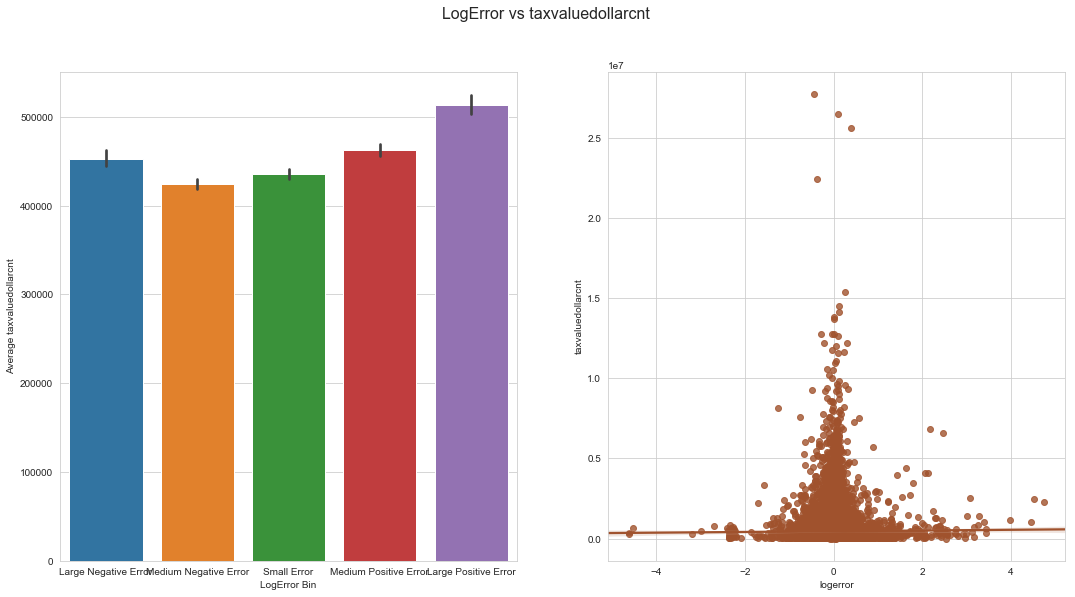

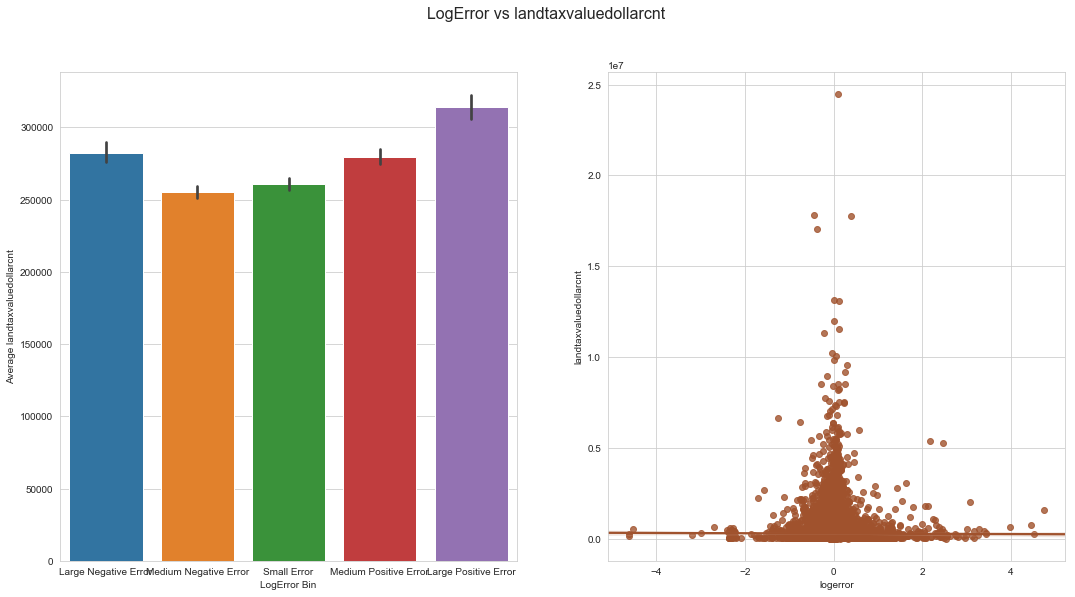

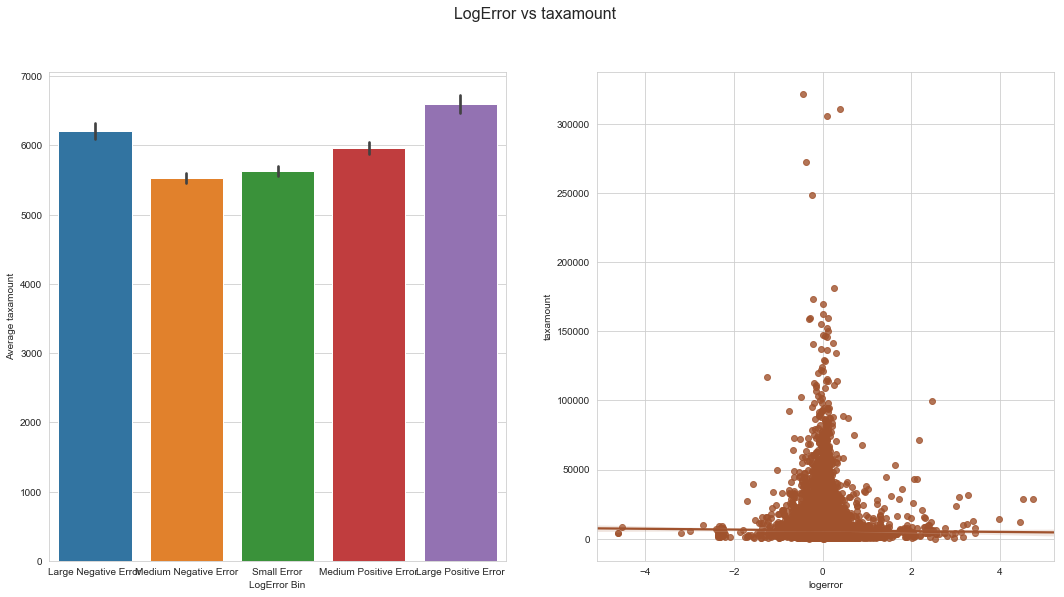

In [27]:
### Continuous variable vs logerror plots
for col in continuous:     
    fig = plt.figure(figsize=(18,9));
    sns.barplot(x='logerror_bin', y=col, data=data_sold, ax = plt.subplot(121),
                order=['Large Negative Error', 'Medium Negative Error','Small Error',
                       'Medium Positive Error', 'Large Positive Error']);
    plt.xlabel('LogError Bin');
    plt.ylabel('Average {}'.format(col));
    sns.regplot(x='logerror', y=col, data=data_sold, color='Sienna', ax = plt.subplot(122));
    plt.suptitle('LogError vs {}'.format(col), fontsize=16)   